In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
import os

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [4]:
# Í∑∏ÎûòÌîÑÏóêÏÑú ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

In [5]:
np.set_printoptions(precision=3)            # ÏÜåÏàòÏ†ê 3Î≤àÏß∏ ÏûêÎ¶¨ÏóêÏÑú Î∞òÏò¨Î¶º
pd.set_option('display.max_rows', None)     # Row ÏÉùÎûµÏóÜÏù¥ Ï∂úÎ†•
pd.set_option('display.max_columns', None)  # Column ÏÉùÎûµÏóÜÏù¥ Ï∂úÎ†•
pd.set_option('display.max_colwidth', None) # Ïª¨ÎüºÏùò ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÎèÑ ÏÉùÎûµÏóÜÏù¥ Ï∂úÎ†•
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.5f}'.format) # 8.500000e+01 Ïù¥Îü∞ ÌòïÏãùÏùò ÏßÄÏàòÌëúÌòÑÏùÑ ÌïòÍ≥† Ïã∂ÏßÄ ÏïäÏùÑ Í≤ΩÏö∞

In [6]:
# ÏÇ¨Ïö©Ìï† ÏÉâÏÉÅ ÌÖåÎßà ÏÑ§Ï†ï
oil_color = "#e67e22"  # Ï£ºÌô©ÏÉâ
materials_color = '#27ae60'  # ÎÖπÏÉâ
trend_color = '#9b59b6'   # Î≥¥ÎùºÏÉâ
seasonal_color = '#f39c12'  # Ï£ºÌô©ÏÉâ
resid_color = '#1abc9c'   # Ï≤≠Î°ùÏÉâ
diff_color = '#e74c3c'    # Î∂âÏùÄÏÉâ

# ÏóëÏÖÄÌåê

In [26]:
df_oil = pd.read_excel("./Ïú†Í∞Ä_ÏõêÏûêÏû¨.xlsx", engine = "openpyxl", header = 0)
df_oil

Unnamed: 0 Unnamed: 1  2015.01 Ïõî  2015.02 Ïõî  2015.03 Ïõî  2015.04 Ïõî  \
0         Ïú†Í∞Ä     Î∞∞Îü¥Îãπ Îã¨Îü¨   47.22000   50.58000   47.82000   54.45000   
1        ÌåúÏò§Ïùº      MYR/T 2146.00000 2305.00000 2165.00000 2102.00000   
2        ÎÇòÌîÑÌÉÄ     Î∞∞Îü¥Îãπ Îã¨Îü¨  504.57000  504.57000  504.57000  563.40000   
3        ÏóêÌã∏Î†å     Î∞∞Îü¥Îãπ Îã¨Îü¨  996.17000  996.17000  996.17000 1383.33000   
4       ÌîÑÎ°úÌïÑÎ†å     Î∞∞Îü¥Îãπ Îã¨Îü¨  912.30000  912.30000  912.30000 1026.00000   
5       HDPE     Î∞∞Îü¥Îãπ Îã¨Îü¨ 1159.08000 1159.08000 1159.08000 1334.50000   
6         PP     Î∞∞Îü¥Îãπ Îã¨Îü¨ 1061.05000 1061.05000 1061.05000 1244.17000   

   2015.05 Ïõî  2015.06 Ïõî  2015.07 Ïõî  2015.08 Ïõî  2015.09 Ïõî  2015.10 Ïõî  \
0   59.27000   59.82000   50.90000   42.87000   45.48000   46.22000   
1 2216.00000 2229.00000 2120.00000 1991.00000 2375.00000 2363.00000   
2  563.40000  563.40000  461.16000  461.16000  461.16000  446.36000   
3 1383.33000 1383.33000  994.35000  994.35000  994.35000 1022.25000   
4 1026.00000 1026.00000  799.82000  799.82000  799.82000  609.05000   
5 1334.50000 1334.50000 1205.58000 1205.58000 1205.58000 1111.50000   
6 1244.17000 1244.17000 1048.50000 1048.50000 1048.50000  888.33000   

   2015.11 Ïõî  2015.12 Ïõî  2016.01 Ïõî  2016.02 Ïõî  2016.03 Ïõî  2016.04 Ïõî  \
0   42.44000   37.19000   31.68000   30.32000   37.55000   40.75000   
1 2344.00000 2485.00000 2443.00000 2548.00000 2725.00000 2593.00000   
2  446.36000  446.36000  346.71000  346.71000  346.71000  412.20000   
3 1022.25000 1022.25000 1028.92000 1028.92000 1028.92000 1140.00000   
4  609.05000  609.05000  642.25000  642.25000  642.25000  735.42000   
5 1111.50000 1111.50000 1084.75000 1084.75000 1084.75000 1134.50000   
6  888.33000  888.33000  851.83000  851.83000  851.83000  953.58000   

   2016.05 Ïõî  2016.06 Ïõî  2016.07 Ïõî  2016.08 Ïõî  2016.09 Ïõî  2016.10 Ïõî  \
0   46.71000   48.76000   44.65000   44.72000   45.18000   49.78000   
1 2620.00000 2353.00000 2316.00000 2526.00000 2636.00000 2763.00000   
2  412.20000  412.20000  390.92000  390.92000  390.92000  450.29000   
3 1140.00000 1140.00000 1141.50000 1141.50000 1141.50000 1066.50000   
4  735.42000  735.42000  803.47000  803.47000  803.47000  852.35000   
5 1134.50000 1134.50000 1105.17000 1105.17000 1105.17000 1126.00000   
6  953.58000  953.58000  979.42000  979.42000  979.42000 1019.17000   

   2016.11 Ïõî  2016.12 Ïõî  2017.01 Ïõî  2017.02 Ïõî  2017.03 Ïõî  2017.04 Ïõî  \
0   45.66000   51.97000   52.50000   53.47000   49.33000   51.06000   
1 3073.00000 3109.00000 3029.00000 2770.00000 2646.00000 2508.00000   
2  450.29000  450.29000  500.81000  500.81000  500.81000  445.30000   
3 1066.50000 1066.50000 1221.50000 1221.50000 1221.50000 1090.73000   
4  852.35000  852.35000  935.30000  935.30000  935.30000  852.02000   
5 1126.00000 1126.00000 1138.50000 1138.50000 1138.50000 1100.92000   
6 1019.17000 1019.17000 1029.83000 1029.83000 1029.83000  982.00000   

   2017.05 Ïõî  2017.06 Ïõî  2017.07 Ïõî  2017.08 Ïõî  2017.09 Ïõî  2017.10 Ïõî  \
0   48.48000   45.18000   46.63000   48.04000   49.82000   51.58000   
1 2499.00000 2459.00000 2675.00000 2706.00000 2695.00000 2815.00000   
2  445.30000  445.30000  467.95000  467.95000  467.95000  574.03000   
3 1090.73000 1090.73000 1163.25000 1163.25000 1163.25000 1300.25000   
4  852.02000  852.02000  921.78000  921.78000  921.78000  968.87000   
5 1100.92000 1100.92000 1093.83000 1093.83000 1093.83000 1167.92000   
6  982.00000  982.00000 1052.08000 1052.08000 1052.08000 1126.50000   

   2017.11 Ïõî  2017.12 Ïõî  2018.01 Ïõî  2018.02 Ïõî  2018.03 Ïõî  2018.04 Ïõî  \
0   56.64000   57.88000   63.70000   62.23000   62.73000   66.25000   
1 2603.00000 2503.00000 2492.00000 2559.00000 2425.00000 2362.00000   
2  574.03000  574.03000  584.53000  584.53000  584.53000  647.23000   
3 1300.25000 1300.25000 1333.92000 1333.92000 1333.92000 1325.42000   
4  968.87000  968.87000 1088.25000 1088.25000 1088.25000 1096.0

In [27]:
df_oil.isnull().sum()

Unnamed: 0    0
Unnamed: 1    0
2015.01 Ïõî     0
2015.02 Ïõî     0
2015.03 Ïõî     0
2015.04 Ïõî     0
2015.05 Ïõî     0
2015.06 Ïõî     0
2015.07 Ïõî     0
2015.08 Ïõî     0
2015.09 Ïõî     0
2015.10 Ïõî     0
2015.11 Ïõî     0
2015.12 Ïõî     0
2016.01 Ïõî     0
2016.02 Ïõî     0
2016.03 Ïõî     0
2016.04 Ïõî     0
2016.05 Ïõî     0
2016.06 Ïõî     0
2016.07 Ïõî     0
2016.08 Ïõî     0
2016.09 Ïõî     0
2016.10 Ïõî     0
2016.11 Ïõî     0
2016.12 Ïõî     0
2017.01 Ïõî     0
2017.02 Ïõî     0
2017.03 Ïõî     0
2017.04 Ïõî     0
2017.05 Ïõî     0
2017.06 Ïõî     0
2017.07 Ïõî     0
2017.08 Ïõî     0
2017.09 Ïõî     0
2017.10 Ïõî     0
2017.11 Ïõî     0
2017.12 Ïõî     0
2018.01 Ïõî     0
2018.02 Ïõî     0
2018.03 Ïõî     0
2018.04 Ïõî     0
2018.05 Ïõî     0
2018.06 Ïõî     0
2018.07 Ïõî     0
2018.08 Ïõî     0
2018.09 Ïõî     0
2018.10 Ïõî     0
2018.11 Ïõî     0
2018.12 Ïõî     0
2019.01 Ïõî     0
2019.02 Ïõî     0
2019.03 Ïõî     0
2019.04 Ïõî     0
2019.05 Ïõî     0
2019.06 Ïõî   

In [28]:
# Ï†úÍ±∞Ìï† Ïª¨Îüº Ìå®ÌÑ¥ Ï†ïÏùò (Unnamed: 0ÏùÄ Ï†úÏô∏)
unit_patterns = ['Î∞∞Îü¥Îãπ', 'Îã¨Îü¨', 'MYR/T', 'USD', '$/barrel', 'Îã®ÏúÑ', 'unit']
columns_to_drop = []

In [29]:
for col in df_oil.columns:
    col_str = str(col).lower()
    # Unnamed: 0ÏùÄ Î≥¥Ï°¥ (Ïú†Í∞Ä/ÏõêÏûêÏû¨ Ï¢ÖÎ•ò Ï†ïÎ≥¥)
    if col_str == 'unnamed: 0':
        continue
    # Îã§Î•∏ Unnamed Ïª¨ÎüºÎì§Í≥º Îã®ÏúÑ Í¥ÄÎ†® ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú Ïª¨Îüº Ï∞æÍ∏∞
    elif ('unnamed:' in col_str and 'unnamed: 0' not in col_str) or any(pattern.lower() in col_str for pattern in unit_patterns):
        columns_to_drop.append(col)
    # ÏôÑÏ†ÑÌûà ÎπÑÏñ¥ÏûàÎäî Ïª¨Îüº Ï∞æÍ∏∞
    elif df_oil[col].isna().all():
        columns_to_drop.append(col)

print(f"Ï†úÍ±∞Ìï† Ïª¨Îüº: {columns_to_drop}")

Ï†úÍ±∞Ìï† Ïª¨Îüº: ['Unnamed: 1']


In [30]:
# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
df_oil = df_oil.drop(columns=columns_to_drop, errors='ignore')

In [31]:
df_oil

Unnamed: 0  2015.01 Ïõî  2015.02 Ïõî  2015.03 Ïõî  2015.04 Ïõî  2015.05 Ïõî  \
0         Ïú†Í∞Ä   47.22000   50.58000   47.82000   54.45000   59.27000   
1        ÌåúÏò§Ïùº 2146.00000 2305.00000 2165.00000 2102.00000 2216.00000   
2        ÎÇòÌîÑÌÉÄ  504.57000  504.57000  504.57000  563.40000  563.40000   
3        ÏóêÌã∏Î†å  996.17000  996.17000  996.17000 1383.33000 1383.33000   
4       ÌîÑÎ°úÌïÑÎ†å  912.30000  912.30000  912.30000 1026.00000 1026.00000   
5       HDPE 1159.08000 1159.08000 1159.08000 1334.50000 1334.50000   
6         PP 1061.05000 1061.05000 1061.05000 1244.17000 1244.17000   

   2015.06 Ïõî  2015.07 Ïõî  2015.08 Ïõî  2015.09 Ïõî  2015.10 Ïõî  2015.11 Ïõî  \
0   59.82000   50.90000   42.87000   45.48000   46.22000   42.44000   
1 2229.00000 2120.00000 1991.00000 2375.00000 2363.00000 2344.00000   
2  563.40000  461.16000  461.16000  461.16000  446.36000  446.36000   
3 1383.33000  994.35000  994.35000  994.35000 1022.25000 1022.25000   
4 1026.00000  799.82000  799.82000  799.82000  609.05000  609.05000   
5 1334.50000 1205.58000 1205.58000 1205.58000 1111.50000 1111.50000   
6 1244.17000 1048.50000 1048.50000 1048.50000  888.33000  888.33000   

   2015.12 Ïõî  2016.01 Ïõî  2016.02 Ïõî  2016.03 Ïõî  2016.04 Ïõî  2016.05 Ïõî  \
0   37.19000   31.68000   30.32000   37.55000   40.75000   46.71000   
1 2485.00000 2443.00000 2548.00000 2725.00000 2593.00000 2620.00000   
2  446.36000  346.71000  346.71000  346.71000  412.20000  412.20000   
3 1022.25000 1028.92000 1028.92000 1028.92000 1140.00000 1140.00000   
4  609.05000  642.25000  642.25000  642.25000  735.42000  735.42000   
5 1111.50000 1084.75000 1084.75000 1084.75000 1134.50000 1134.50000   
6  888.33000  851.83000  851.83000  851.83000  953.58000  953.58000   

   2016.06 Ïõî  2016.07 Ïõî  2016.08 Ïõî  2016.09 Ïõî  2016.10 Ïõî  2016.11 Ïõî  \
0   48.76000   44.65000   44.72000   45.18000   49.78000   45.66000   
1 2353.00000 2316.00000 2526.00000 2636.00000 2763.00000 3073.00000   
2  412.20000  390.92000  390.92000  390.92000  450.29000  450.29000   
3 1140.00000 1141.50000 1141.50000 1141.50000 1066.50000 1066.50000   
4  735.42000  803.47000  803.47000  803.47000  852.35000  852.35000   
5 1134.50000 1105.17000 1105.17000 1105.17000 1126.00000 1126.00000   
6  953.58000  979.42000  979.42000  979.42000 1019.17000 1019.17000   

   2016.12 Ïõî  2017.01 Ïõî  2017.02 Ïõî  2017.03 Ïõî  2017.04 Ïõî  2017.05 Ïõî  \
0   51.97000   52.50000   53.47000   49.33000   51.06000   48.48000   
1 3109.00000 3029.00000 2770.00000 2646.00000 2508.00000 2499.00000   
2  450.29000  500.81000  500.81000  500.81000  445.30000  445.30000   
3 1066.50000 1221.50000 1221.50000 1221.50000 1090.73000 1090.73000   
4  852.35000  935.30000  935.30000  935.30000  852.02000  852.02000   
5 1126.00000 1138.50000 1138.50000 1138.50000 1100.92000 1100.92000   
6 1019.17000 1029.83000 1029.83000 1029.83000  982.00000  982.00000   

   2017.06 Ïõî  2017.07 Ïõî  2017.08 Ïõî  2017.09 Ïõî  2017.10 Ïõî  2017.11 Ïõî  \
0   45.18000   46.63000   48.04000   49.82000   51.58000   56.64000   
1 2459.00000 2675.00000 2706.00000 2695.00000 2815.00000 2603.00000   
2  445.30000  467.95000  467.95000  467.95000  574.03000  574.03000   
3 1090.73000 1163.25000 1163.25000 1163.25000 1300.25000 1300.25000   
4  852.02000  921.78000  921.78000  921.78000  968.87000  968.87000   
5 1100.92000 1093.83000 1093.83000 1093.83000 1167.92000 1167.92000   
6  982.00000 1052.08000 1052.08000 1052.08000 1126.50000 1126.50000   

   2017.12 Ïõî  2018.01 Ïõî  2018.02 Ïõî  2018.03 Ïõî  2018.04 Ïõî  2018.05 Ïõî  \
0   57.88000   63.70000   62.23000   62.73000   66.25000   69.98000   
1 2503.00000 2492.00000 2559.00000 2425.00000 2362.00000 2429.00000   
2  574.03000  584.53000  584.53000  584.53000  647.23000  647.23000   
3 1300.25000 1333.92000 1333.92000 1333.92000 1325.42000 1325.42000   
4  968.87000 1088.25000 1088.25000 1088.25000 1096.00000 1096.00000   
5 1167.92000 1227.33000 1227.33000 1227.33000 1215

In [32]:
if not df_oil['Unnamed: 0'].isnull().all():
    df_oil = df_oil.rename(columns={'Unnamed: 0': 'ÌíàÎ™©Î™Ö'})
    print("'Unnamed: 0'ÏùÑ 'ÌíàÎ™©Î™Ö'ÏúºÎ°ú Î≥ÄÍ≤ΩÌñàÏäµÎãàÎã§.")
else:
    print("'Unnamed: 0' Ïª¨ÎüºÏù¥ Î™®Îëê ÎπÑÏñ¥ÏûàÏñ¥ÏÑú Ï†úÍ±∞Ìï©ÎãàÎã§.")
    df_oil = df_oil.drop(columns=['Unnamed: 0'])

'Unnamed: 0'ÏùÑ 'ÌíàÎ™©Î™Ö'ÏúºÎ°ú Î≥ÄÍ≤ΩÌñàÏäµÎãàÎã§.


In [33]:
# Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Ïû¨ÌôïÏù∏
print(f"\nÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞:")
print(f"Ïó¥ Ïù¥Î¶Ñ: {df_oil.columns.tolist()}")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:\n{df_oil.dtypes}")
print(f"Ï≤òÏùå 5Ìñâ:\n{df_oil.head()}")


ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞:
Ïó¥ Ïù¥Î¶Ñ: ['ÌíàÎ™©Î™Ö', '2015.01 Ïõî', '2015.02 Ïõî', '2015.03 Ïõî', '2015.04 Ïõî', '2015.05 Ïõî', '2015.06 Ïõî', '2015.07 Ïõî', '2015.08 Ïõî', '2015.09 Ïõî', '2015.10 Ïõî', '2015.11 Ïõî', '2015.12 Ïõî', '2016.01 Ïõî', '2016.02 Ïõî', '2016.03 Ïõî', '2016.04 Ïõî', '2016.05 Ïõî', '2016.06 Ïõî', '2016.07 Ïõî', '2016.08 Ïõî', '2016.09 Ïõî', '2016.10 Ïõî', '2016.11 Ïõî', '2016.12 Ïõî', '2017.01 Ïõî', '2017.02 Ïõî', '2017.03 Ïõî', '2017.04 Ïõî', '2017.05 Ïõî', '2017.06 Ïõî', '2017.07 Ïõî', '2017.08 Ïõî', '2017.09 Ïõî', '2017.10 Ïõî', '2017.11 Ïõî', '2017.12 Ïõî', '2018.01 Ïõî', '2018.02 Ïõî', '2018.03 Ïõî', '2018.04 Ïõî', '2018.05 Ïõî', '2018.06 Ïõî', '2018.07 Ïõî', '2018.08 Ïõî', '2018.09 Ïõî', '2018.10 Ïõî', '2018.11 Ïõî', '2018.12 Ïõî', '2019.01 Ïõî', '2019.02 Ïõî', '2019.03 Ïõî', '2019.04 Ïõî', '2019.05 Ïõî', '2019.06 Ïõî', '2019.07 Ïõî', '2019.08 Ïõî', '2019.09 Ïõî', '2019.10 Ïõî', '2019.11 Ïõî', '2019.12 Ïõî', '2020.01 Ïõî', '2020.02 Ïõî', '2020.03 Ïõî', '20

In [34]:
df_oil

ÌíàÎ™©Î™Ö  2015.01 Ïõî  2015.02 Ïõî  2015.03 Ïõî  2015.04 Ïõî  2015.05 Ïõî  2015.06 Ïõî  \
0    Ïú†Í∞Ä   47.22000   50.58000   47.82000   54.45000   59.27000   59.82000   
1   ÌåúÏò§Ïùº 2146.00000 2305.00000 2165.00000 2102.00000 2216.00000 2229.00000   
2   ÎÇòÌîÑÌÉÄ  504.57000  504.57000  504.57000  563.40000  563.40000  563.40000   
3   ÏóêÌã∏Î†å  996.17000  996.17000  996.17000 1383.33000 1383.33000 1383.33000   
4  ÌîÑÎ°úÌïÑÎ†å  912.30000  912.30000  912.30000 1026.00000 1026.00000 1026.00000   
5  HDPE 1159.08000 1159.08000 1159.08000 1334.50000 1334.50000 1334.50000   
6    PP 1061.05000 1061.05000 1061.05000 1244.17000 1244.17000 1244.17000   

   2015.07 Ïõî  2015.08 Ïõî  2015.09 Ïõî  2015.10 Ïõî  2015.11 Ïõî  2015.12 Ïõî  \
0   50.90000   42.87000   45.48000   46.22000   42.44000   37.19000   
1 2120.00000 1991.00000 2375.00000 2363.00000 2344.00000 2485.00000   
2  461.16000  461.16000  461.16000  446.36000  446.36000  446.36000   
3  994.35000  994.35000  994.35000 1022.25000 1022.25000 1022.25000   
4  799.82000  799.82000  799.82000  609.05000  609.05000  609.05000   
5 1205.58000 1205.58000 1205.58000 1111.50000 1111.50000 1111.50000   
6 1048.50000 1048.50000 1048.50000  888.33000  888.33000  888.33000   

   2016.01 Ïõî  2016.02 Ïõî  2016.03 Ïõî  2016.04 Ïõî  2016.05 Ïõî  2016.06 Ïõî  \
0   31.68000   30.32000   37.55000   40.75000   46.71000   48.76000   
1 2443.00000 2548.00000 2725.00000 2593.00000 2620.00000 2353.00000   
2  346.71000  346.71000  346.71000  412.20000  412.20000  412.20000   
3 1028.92000 1028.92000 1028.92000 1140.00000 1140.00000 1140.00000   
4  642.25000  642.25000  642.25000  735.42000  735.42000  735.42000   
5 1084.75000 1084.75000 1084.75000 1134.50000 1134.50000 1134.50000   
6  851.83000  851.83000  851.83000  953.58000  953.58000  953.58000   

   2016.07 Ïõî  2016.08 Ïõî  2016.09 Ïõî  2016.10 Ïõî  2016.11 Ïõî  2016.12 Ïõî  \
0   44.65000   44.72000   45.18000   49.78000   45.66000   51.97000   
1 2316.00000 2526.00000 2636.00000 2763.00000 3073.00000 3109.00000   
2  390.92000  390.92000  390.92000  450.29000  450.29000  450.29000   
3 1141.50000 1141.50000 1141.50000 1066.50000 1066.50000 1066.50000   
4  803.47000  803.47000  803.47000  852.35000  852.35000  852.35000   
5 1105.17000 1105.17000 1105.17000 1126.00000 1126.00000 1126.00000   
6  979.42000  979.42000  979.42000 1019.17000 1019.17000 1019.17000   

   2017.01 Ïõî  2017.02 Ïõî  2017.03 Ïõî  2017.04 Ïõî  2017.05 Ïõî  2017.06 Ïõî  \
0   52.50000   53.47000   49.33000   51.06000   48.48000   45.18000   
1 3029.00000 2770.00000 2646.00000 2508.00000 2499.00000 2459.00000   
2  500.81000  500.81000  500.81000  445.30000  445.30000  445.30000   
3 1221.50000 1221.50000 1221.50000 1090.73000 1090.73000 1090.73000   
4  935.30000  935.30000  935.30000  852.02000  852.02000  852.02000   
5 1138.50000 1138.50000 1138.50000 1100.92000 1100.92000 1100.92000   
6 1029.83000 1029.83000 1029.83000  982.00000  982.00000  982.00000   

   2017.07 Ïõî  2017.08 Ïõî  2017.09 Ïõî  2017.10 Ïõî  2017.11 Ïõî  2017.12 Ïõî  \
0   46.63000   48.04000   49.82000   51.58000   56.64000   57.88000   
1 2675.00000 2706.00000 2695.00000 2815.00000 2603.00000 2503.00000   
2  467.95000  467.95000  467.95000  574.03000  574.03000  574.03000   
3 1163.25000 1163.25000 1163.25000 1300.25000 1300.25000 1300.25000   
4  921.78000  921.78000  921.78000  968.87000  968.87000  968.87000   
5 1093.83000 1093.83000 1093.83000 1167.92000 1167.92000 1167.92000   
6 1052.08000 1052.08000 1052.08000 1126.50000 1126.50000 1126.50000   

   2018.01 Ïõî  2018.02 Ïõî  2018.03 Ïõî  2018.04 Ïõî  2018.05 Ïõî  2018.06 Ïõî  \
0   63.70000   62.23000   62.73000   66.25000   69.98000   67.87000   
1 2492.00000 2559.00000 2425.00000 2362.00000 2429.00000 2326.00000   
2  584.53000  584.53000  584.53000  647.23000  647.23000  647.23000   
3 1333.92000 1333.92000 1333.92000 1325.42000 1325.42000 1325.42000   
4 1088.25000 1088.25000 1088.25000 1096.00000 1096.00000 1096.00000

In [35]:
# ÎÑìÏùÄ ÌòïÏãù -> Í∏¥ ÌòïÏãù Î≥ÄÌôò (Melt)
print("=== Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò: ÎÑìÏùÄ ÌòïÏãù -> Í∏¥ ÌòïÏãù ===")

=== Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò: ÎÑìÏùÄ ÌòïÏãù -> Í∏¥ ÌòïÏãù ===


In [36]:
# Ïª¨Îüº ÌôïÏù∏ Î∞è ÎîîÎ≤ÑÍπÖ
print("ÌòÑÏû¨ Ïª¨Îüº Î¶¨Ïä§Ìä∏:")
print(df_oil.columns.tolist())

print(f"\nÏ†ÑÏ≤¥ Ïª¨Îüº Í∞úÏàò: {len(df_oil.columns)}")

ÌòÑÏû¨ Ïª¨Îüº Î¶¨Ïä§Ìä∏:
['ÌíàÎ™©Î™Ö', '2015.01 Ïõî', '2015.02 Ïõî', '2015.03 Ïõî', '2015.04 Ïõî', '2015.05 Ïõî', '2015.06 Ïõî', '2015.07 Ïõî', '2015.08 Ïõî', '2015.09 Ïõî', '2015.10 Ïõî', '2015.11 Ïõî', '2015.12 Ïõî', '2016.01 Ïõî', '2016.02 Ïõî', '2016.03 Ïõî', '2016.04 Ïõî', '2016.05 Ïõî', '2016.06 Ïõî', '2016.07 Ïõî', '2016.08 Ïõî', '2016.09 Ïõî', '2016.10 Ïõî', '2016.11 Ïõî', '2016.12 Ïõî', '2017.01 Ïõî', '2017.02 Ïõî', '2017.03 Ïõî', '2017.04 Ïõî', '2017.05 Ïõî', '2017.06 Ïõî', '2017.07 Ïõî', '2017.08 Ïõî', '2017.09 Ïõî', '2017.10 Ïõî', '2017.11 Ïõî', '2017.12 Ïõî', '2018.01 Ïõî', '2018.02 Ïõî', '2018.03 Ïõî', '2018.04 Ïõî', '2018.05 Ïõî', '2018.06 Ïõî', '2018.07 Ïõî', '2018.08 Ïõî', '2018.09 Ïõî', '2018.10 Ïõî', '2018.11 Ïõî', '2018.12 Ïõî', '2019.01 Ïõî', '2019.02 Ïõî', '2019.03 Ïõî', '2019.04 Ïõî', '2019.05 Ïõî', '2019.06 Ïõî', '2019.07 Ïõî', '2019.08 Ïõî', '2019.09 Ïõî', '2019.10 Ïõî', '2019.11 Ïõî', '2019.12 Ïõî', '2020.01 Ïõî', '2020.02 Ïõî', '2020.03 Ïõî', '2020.04 Ïõî', '

In [37]:
# Í∞Å Ïª¨ÎüºÎ≥ÑÎ°ú Ï°∞Í±¥ ÌôïÏù∏
print("\nÍ∞Å Ïª¨ÎüºÎ≥Ñ Ï°∞Í±¥ ÌôïÏù∏:")
for col in df_oil.columns:
    has_dot = '.' in str(col)
    has_month = 'Ïõî' in str(col)
    print(f"'{col}' -> '.' Ìè¨Ìï®: {has_dot}, 'Ïõî' Ìè¨Ìï®: {has_month}")


Í∞Å Ïª¨ÎüºÎ≥Ñ Ï°∞Í±¥ ÌôïÏù∏:
'ÌíàÎ™©Î™Ö' -> '.' Ìè¨Ìï®: False, 'Ïõî' Ìè¨Ìï®: False
'2015.01 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.02 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.03 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.04 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.05 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.06 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.07 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.08 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.09 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.10 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.11 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2015.12 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2016.01 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2016.02 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2016.03 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2016.04 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: True
'2016.05 Ïõî' -> '.' Ìè¨Ìï®: True, 'Ïõî' Ìè¨Ìï®: Tru

In [38]:
# ÎÇ†Ïßú Ïª¨Îüº Ï∞æÍ∏∞ ('2015.01 Ïõî' ÌòïÌÉú) - ÌíàÎ™©Î™Ö Ï†úÏô∏
date_cols = [col for col in df_oil.columns if col != 'ÌíàÎ™©Î™Ö']
print(f"\nÌíàÎ™©Î™Ö Ï†úÏô∏Ìïú Ïª¨ÎüºÎì§: {len(date_cols)}Í∞ú")
print(f"Ï≤òÏùå 5Í∞ú: {date_cols[:5]}")


ÌíàÎ™©Î™Ö Ï†úÏô∏Ìïú Ïª¨ÎüºÎì§: 120Í∞ú
Ï≤òÏùå 5Í∞ú: ['2015.01 Ïõî', '2015.02 Ïõî', '2015.03 Ïõî', '2015.04 Ïõî', '2015.05 Ïõî']


In [39]:
# Ï°∞Í±¥Î≥ÑÎ°ú Îã§Ïãú ÌôïÏù∏
dot_cols = [col for col in df_oil.columns if '.' in str(col)]
month_cols = [col for col in df_oil.columns if 'Ïõî' in str(col)]
both_cols = [col for col in df_oil.columns if '.' in str(col) and 'Ïõî' in str(col)]

print(f"\n'.' Ìè¨Ìï® Ïª¨Îüº: {len(dot_cols)}Í∞ú")
print(f"'Ïõî' Ìè¨Ìï® Ïª¨Îüº: {len(month_cols)}Í∞ú") 
print(f"Îëò Îã§ Ìè¨Ìï® Ïª¨Îüº: {len(both_cols)}Í∞ú")

if len(both_cols) > 0:
    print(f"Îëò Îã§ Ìè¨Ìï® Ïª¨Îüº ÏòàÏãú: {both_cols[:5]}")
    date_cols = both_cols
else:
    # ÌíàÎ™©Î™ÖÎßå Ï†úÏô∏ÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎ•º ÎÇ†Ïßú Ïª¨ÎüºÏúºÎ°ú ÏÇ¨Ïö©
    date_cols = [col for col in df_oil.columns if col != 'ÌíàÎ™©Î™Ö']
    print("Ï°∞Í±¥Ïóê ÎßûÎäî Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ÏÑú ÌíàÎ™©Î™Ö Ï†úÏô∏Ìïú Î™®Îì† Ïª¨ÎüºÏùÑ ÎÇ†Ïßú Ïª¨ÎüºÏúºÎ°ú ÏÇ¨Ïö©")

print(f"\nÏµúÏ¢Ö ÎÇ†Ïßú Ïª¨Îüº Í∞úÏàò: {len(date_cols)}")
print(f"ÎÇ†Ïßú Ïª¨Îüº ÏòàÏãú: {date_cols[:5] if len(date_cols) > 0 else 'ÏóÜÏùå'}")


'.' Ìè¨Ìï® Ïª¨Îüº: 120Í∞ú
'Ïõî' Ìè¨Ìï® Ïª¨Îüº: 120Í∞ú
Îëò Îã§ Ìè¨Ìï® Ïª¨Îüº: 120Í∞ú
Îëò Îã§ Ìè¨Ìï® Ïª¨Îüº ÏòàÏãú: ['2015.01 Ïõî', '2015.02 Ïõî', '2015.03 Ïõî', '2015.04 Ïõî', '2015.05 Ïõî']

ÏµúÏ¢Ö ÎÇ†Ïßú Ïª¨Îüº Í∞úÏàò: 120
ÎÇ†Ïßú Ïª¨Îüº ÏòàÏãú: ['2015.01 Ïõî', '2015.02 Ïõî', '2015.03 Ïõî', '2015.04 Ïõî', '2015.05 Ïõî']


In [40]:
# melt Î≥ÄÌôò
df_oil_long = pd.melt(df_oil, 
                     id_vars=['ÌíàÎ™©Î™Ö'], 
                     value_vars=date_cols, 
                     var_name='ÎÇ†Ïßú', 
                     value_name='Í∞ÄÍ≤©')

print(f"\nÎ≥ÄÌôò ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_oil_long.shape}")
print("\nÎ≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ Ï≤òÏùå 5Ìñâ:")
print(df_oil_long.head())


Î≥ÄÌôò ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (840, 3)

Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ Ï≤òÏùå 5Ìñâ:
    ÌíàÎ™©Î™Ö         ÎÇ†Ïßú         Í∞ÄÍ≤©
0    Ïú†Í∞Ä  2015.01 Ïõî   47.22000
1   ÌåúÏò§Ïùº  2015.01 Ïõî 2146.00000
2   ÎÇòÌîÑÌÉÄ  2015.01 Ïõî  504.57000
3   ÏóêÌã∏Î†å  2015.01 Ïõî  996.17000
4  ÌîÑÎ°úÌïÑÎ†å  2015.01 Ïõî  912.30000


In [41]:
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
print("\n=== ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò ===")
def convert_date_format(date_str):
    """'2015.01 Ïõî' -> '2015-01-01' ÌòïÌÉúÎ°ú Î≥ÄÌôò"""
    try:
        # '2015.01 Ïõî' -> '2015.01'
        date_clean = str(date_str).replace(' Ïõî', '').strip()
        # '2015.01' -> '2015-01-01'
        year, month = date_clean.split('.')
        return f"{year}-{month.zfill(2)}-01"
    except:
        return date_str

df_oil_long['ÎÇ†Ïßú'] = df_oil_long['ÎÇ†Ïßú'].apply(convert_date_format)
df_oil_long['ÎÇ†Ïßú'] = pd.to_datetime(df_oil_long['ÎÇ†Ïßú'])

print("ÎÇ†Ïßú Î≥ÄÌôò ÏôÑÎ£å!")
print(f"ÎÇ†Ïßú Î≤îÏúÑ: {df_oil_long['ÎÇ†Ïßú'].min()} ~ {df_oil_long['ÎÇ†Ïßú'].max()}")



=== ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò ===
ÎÇ†Ïßú Î≥ÄÌôò ÏôÑÎ£å!
ÎÇ†Ïßú Î≤îÏúÑ: 2015-01-01 00:00:00 ~ 2024-12-01 00:00:00


In [42]:
# ÎÇ†ÏßúÎ•º Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
df_oil_long.set_index('ÎÇ†Ïßú', inplace=True)

print("\nÎ≥ÄÌôò ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏:")
print(df_oil_long.head(10))
print(f"\nÌíàÎ™©Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
print(df_oil_long['ÌíàÎ™©Î™Ö'].value_counts())


Î≥ÄÌôò ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏:
             ÌíàÎ™©Î™Ö         Í∞ÄÍ≤©
ÎÇ†Ïßú                         
2015-01-01    Ïú†Í∞Ä   47.22000
2015-01-01   ÌåúÏò§Ïùº 2146.00000
2015-01-01   ÎÇòÌîÑÌÉÄ  504.57000
2015-01-01   ÏóêÌã∏Î†å  996.17000
2015-01-01  ÌîÑÎ°úÌïÑÎ†å  912.30000
2015-01-01  HDPE 1159.08000
2015-01-01    PP 1061.05000
2015-02-01    Ïú†Í∞Ä   50.58000
2015-02-01   ÌåúÏò§Ïùº 2305.00000
2015-02-01   ÎÇòÌîÑÌÉÄ  504.57000

ÌíàÎ™©Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:
ÌíàÎ™©Î™Ö
Ïú†Í∞Ä      120
ÌåúÏò§Ïùº     120
ÎÇòÌîÑÌÉÄ     120
ÏóêÌã∏Î†å     120
ÌîÑÎ°úÌïÑÎ†å    120
HDPE    120
PP      120
Name: count, dtype: int64


In [43]:
# ÏÉâÏÉÅ ÏÑ§Ï†ï
colors = ['#e67e22', '#27ae60', '#3498db', '#9b59b6', '#e74c3c', '#f39c12', '#1abc9c']
ÌíàÎ™©_Î¶¨Ïä§Ìä∏ = df_oil_long['ÌíàÎ™©Î™Ö'].unique()

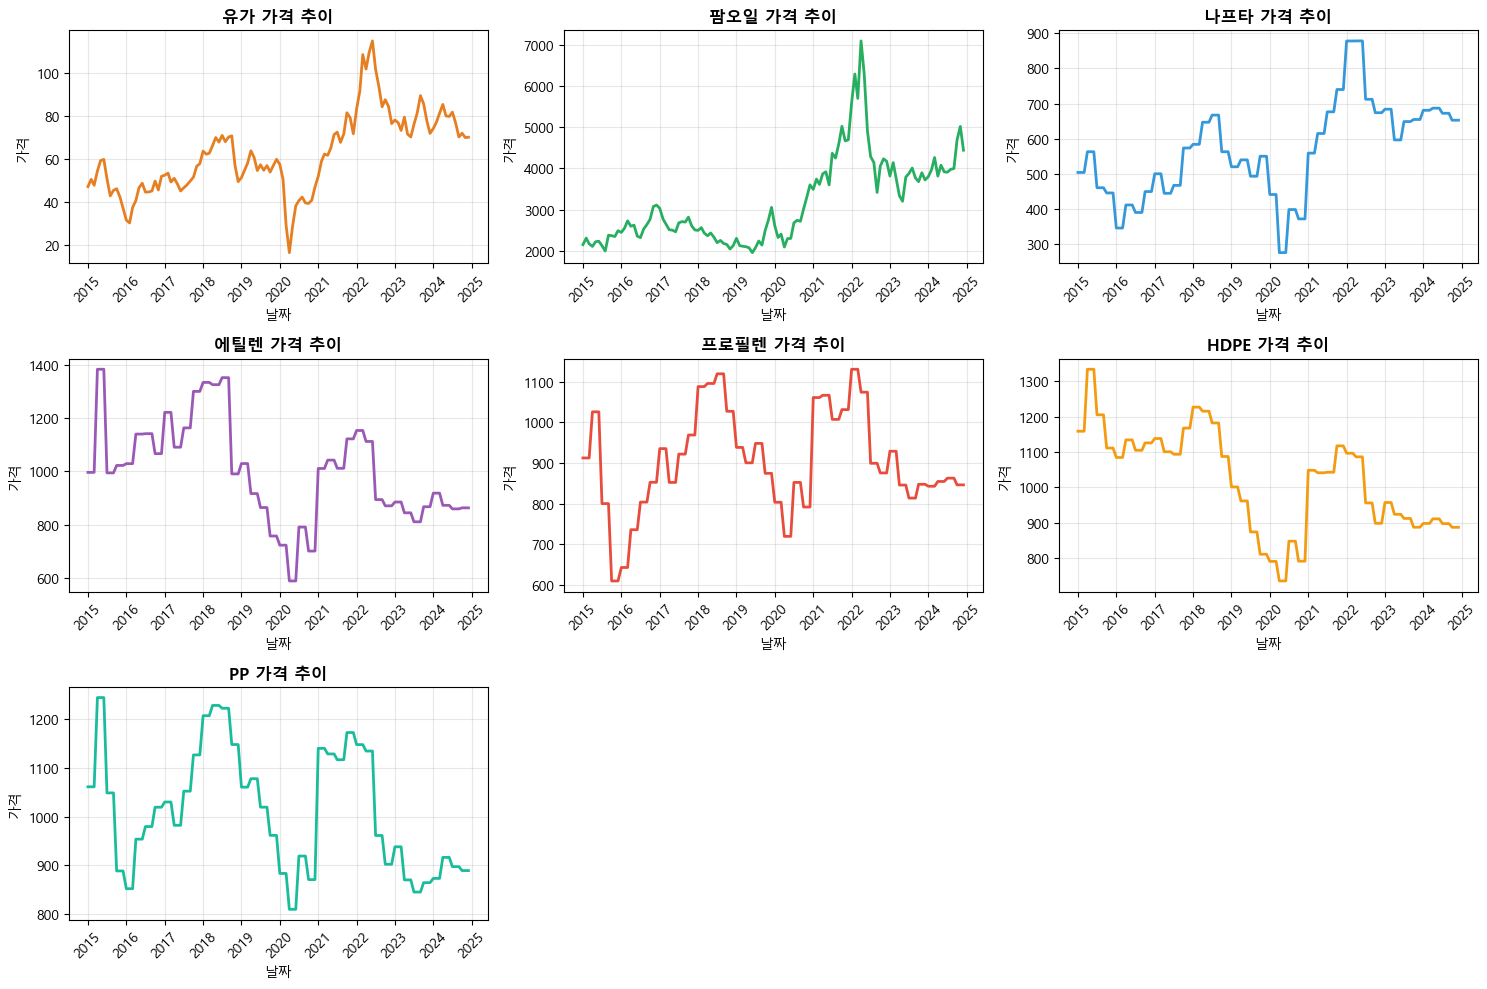

In [44]:
plt.figure(figsize=(15, 10))

for i, ÌíàÎ™© in enumerate(ÌíàÎ™©_Î¶¨Ïä§Ìä∏):
    ÌíàÎ™©_data = df_oil_long[df_oil_long['ÌíàÎ™©Î™Ö'] == ÌíàÎ™©]['Í∞ÄÍ≤©']
    
    plt.subplot(3, 3, i+1)
    plt.plot(ÌíàÎ™©_data.index, ÌíàÎ™©_data, color=colors[i % len(colors)], linewidth=2)
    plt.title(f'{ÌíàÎ™©} Í∞ÄÍ≤© Ï∂îÏù¥', fontsize=12, fontweight='bold')
    plt.xlabel('ÎÇ†Ïßú', fontsize=10)
    plt.ylabel('Í∞ÄÍ≤©', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


=== ÌíàÎ™©Î≥Ñ Í∞úÎ≥Ñ ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ ÏãúÏûë (7Í∞ú ÌíàÎ™©) ===

üìä Ïú†Í∞Ä Î∂ÑÏÑù Ï§ë... (1/7)

üìà Ïú†Í∞Ä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
   ÌèâÍ∑†: 62.08
   ÏµúÏÜüÍ∞í: 16.55 (2020-04)
   ÏµúÎåìÍ∞í: 114.84 (2022-06)
   ÌëúÏ§ÄÌé∏Ï∞®: 18.21
   Î≥ÄÎèôÍ≥ÑÏàò: 29.3%

üîç Ïú†Í∞Ä ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Ï§ë...


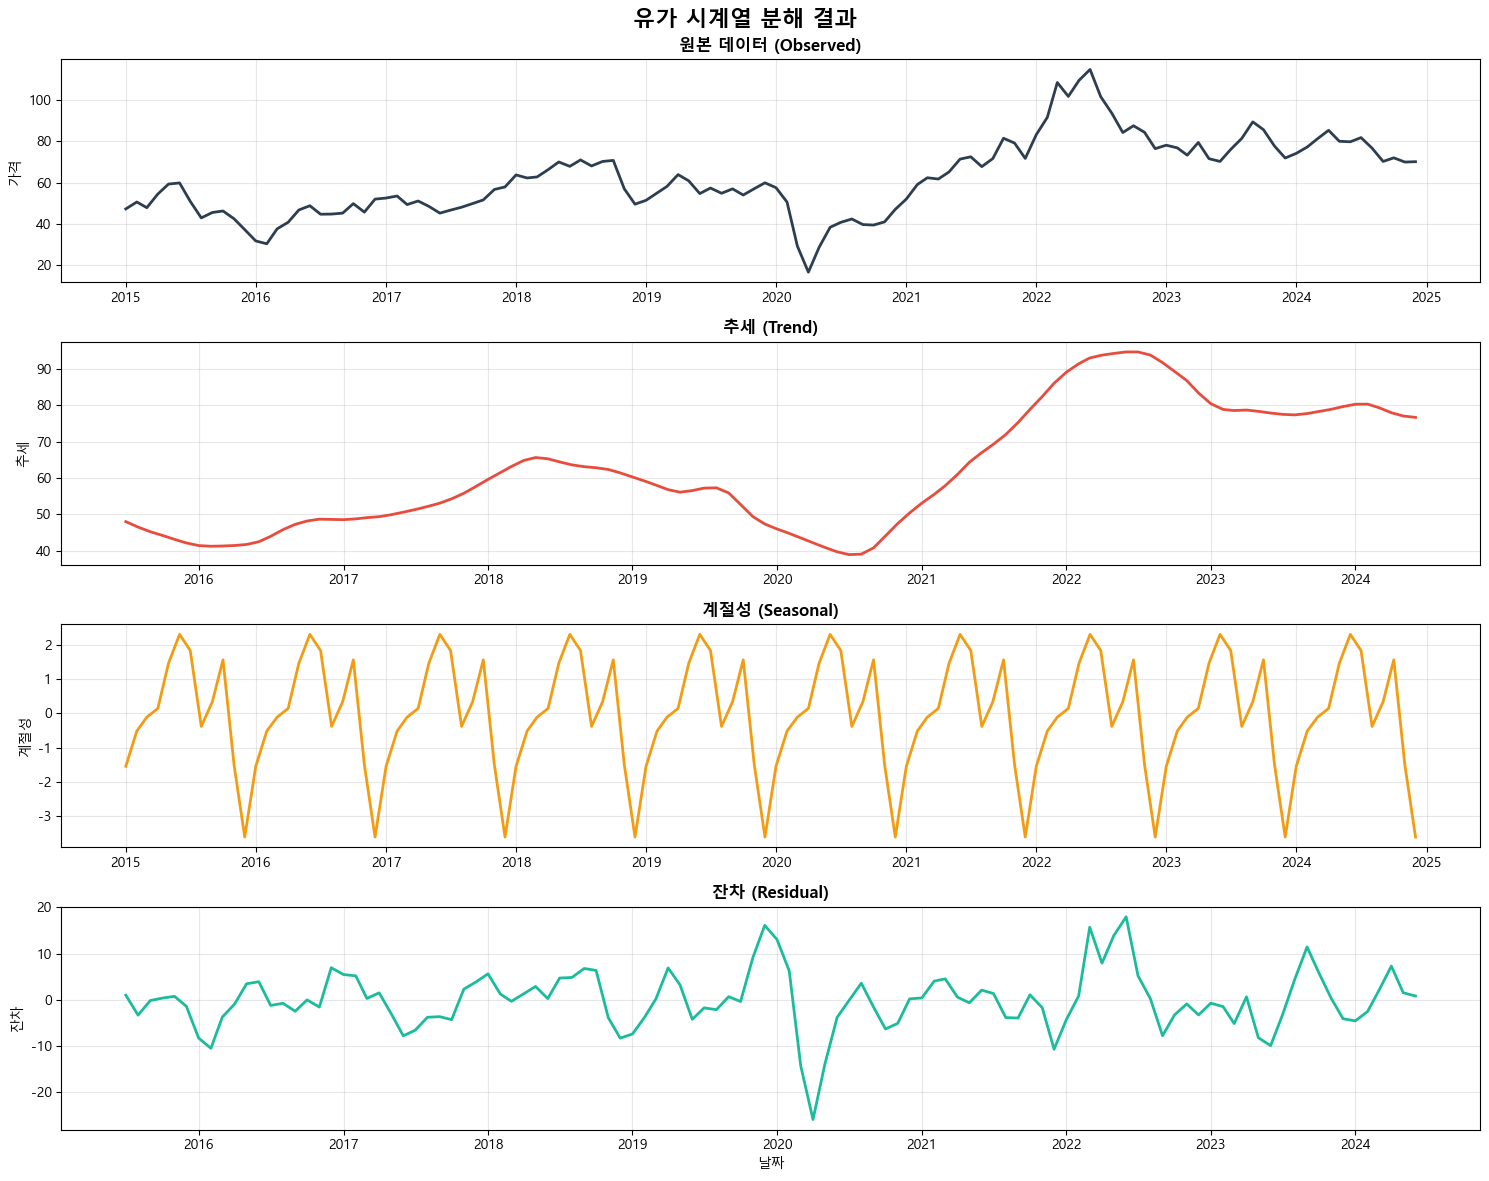

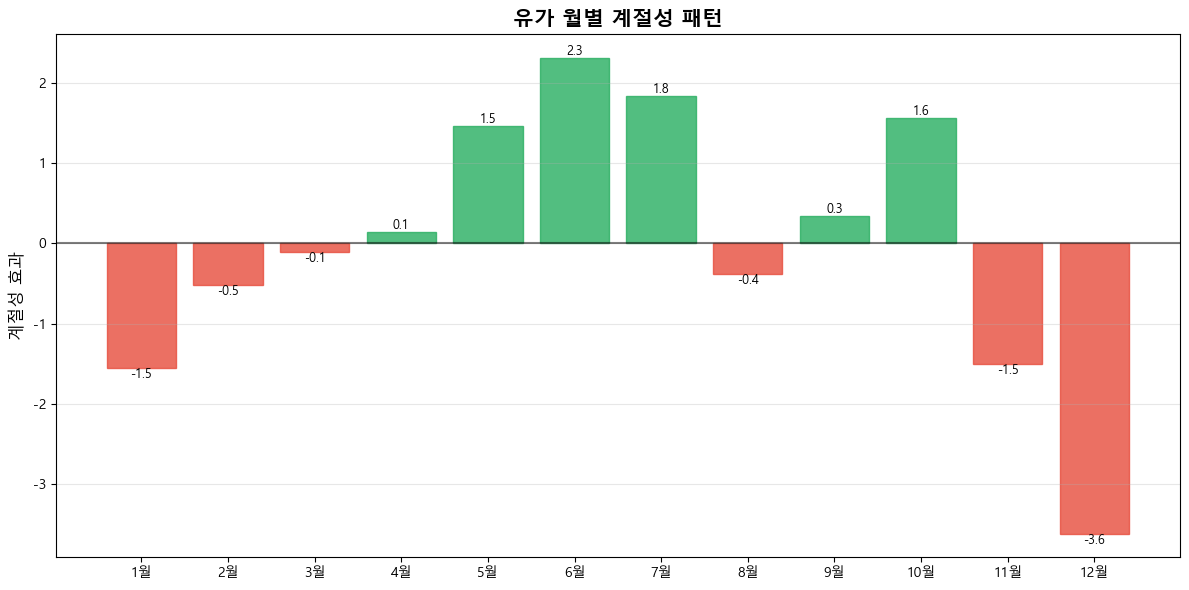


üìÖ Ïú†Í∞Ä Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù:
   ÏµúÍ≥†Ï†ê: 6Ïõî (2.31)
   ÏµúÏ†ÄÏ†ê: 12Ïõî (-3.62)
   Í≥ÑÏ†àÏÑ± Î≥ÄÎèôÌè≠: 5.93

üî¨ Ïú†Í∞Ä Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï:
   ADF ÌÜµÍ≥ÑÎüâ: -2.228770
   p-value: 0.195970
   ‚ùå Ïú†Í∞Ä ÎπÑÏ†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p > 0.05)

üîÑ Ïú†Í∞Ä 1Ï∞® Ï∞®Î∂Ñ Ï†ÅÏö©:
   ADF ÌÜµÍ≥ÑÎüâ: -7.821311
   p-value: 0.000000
   ‚úÖ Ïú†Í∞Ä 1Ï∞® Ï∞®Î∂Ñ Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p < 0.05)


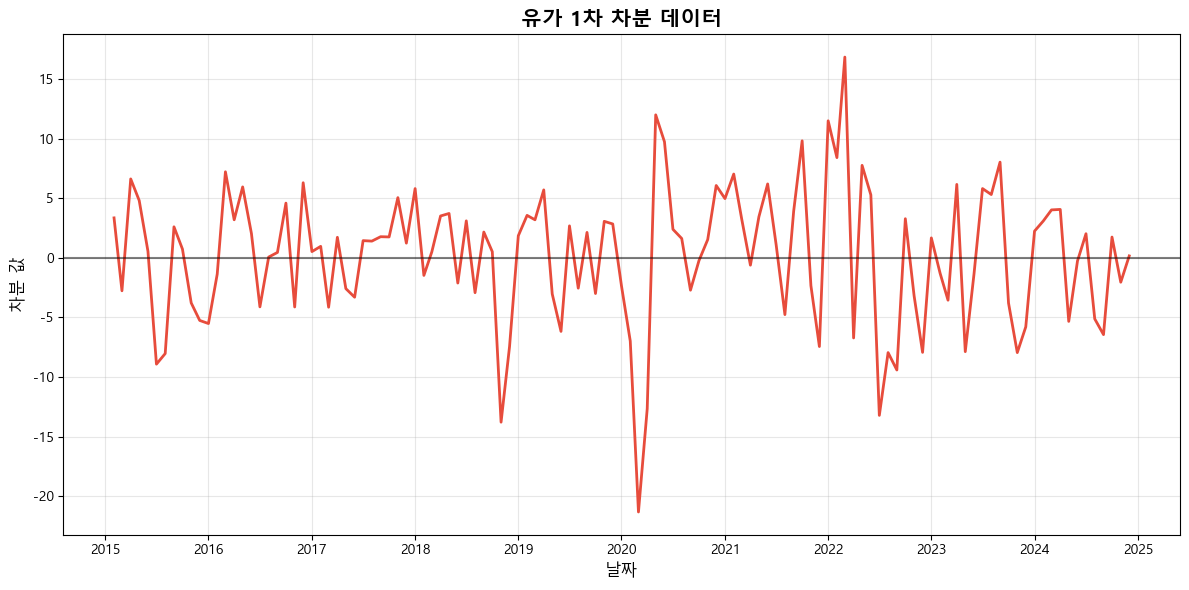


üìä Ïú†Í∞Ä ÏûêÍ∏∞ÏÉÅÍ¥Ä Î∂ÑÏÑù:


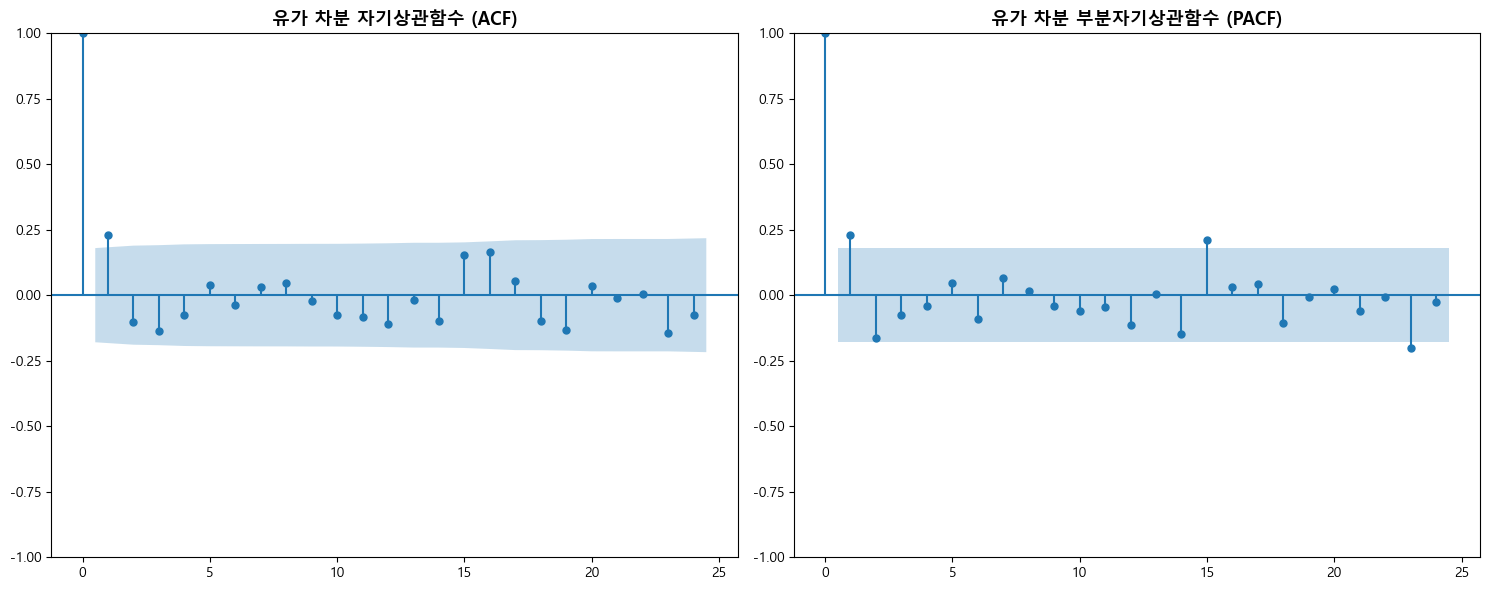

‚úÖ Ïú†Í∞Ä Î∂ÑÏÑù ÏôÑÎ£å!

üìä ÌåúÏò§Ïùº Î∂ÑÏÑù Ï§ë... (2/7)

üìà ÌåúÏò§Ïùº Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
   ÌèâÍ∑†: 3186.13
   ÏµúÏÜüÍ∞í: 1951.00 (2019-06)
   ÏµúÎåìÍ∞í: 7104.00 (2022-04)
   ÌëúÏ§ÄÌé∏Ï∞®: 1051.91
   Î≥ÄÎèôÍ≥ÑÏàò: 33.0%

üîç ÌåúÏò§Ïùº ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Ï§ë...


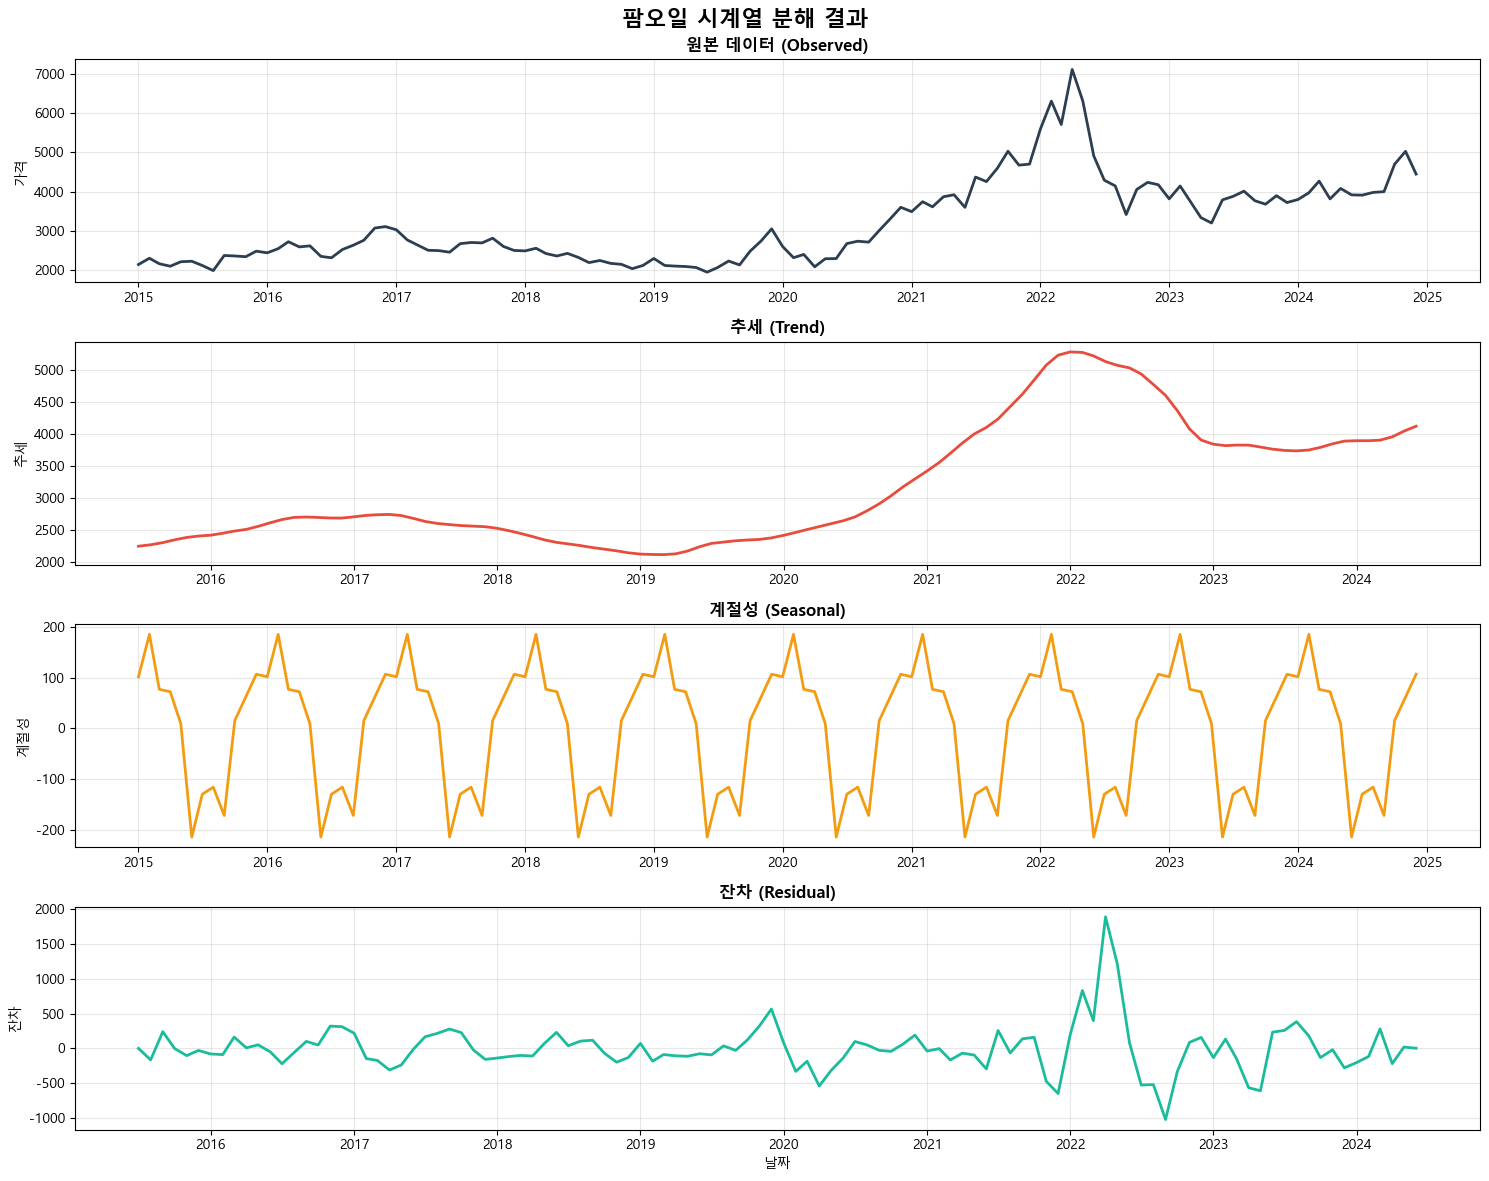

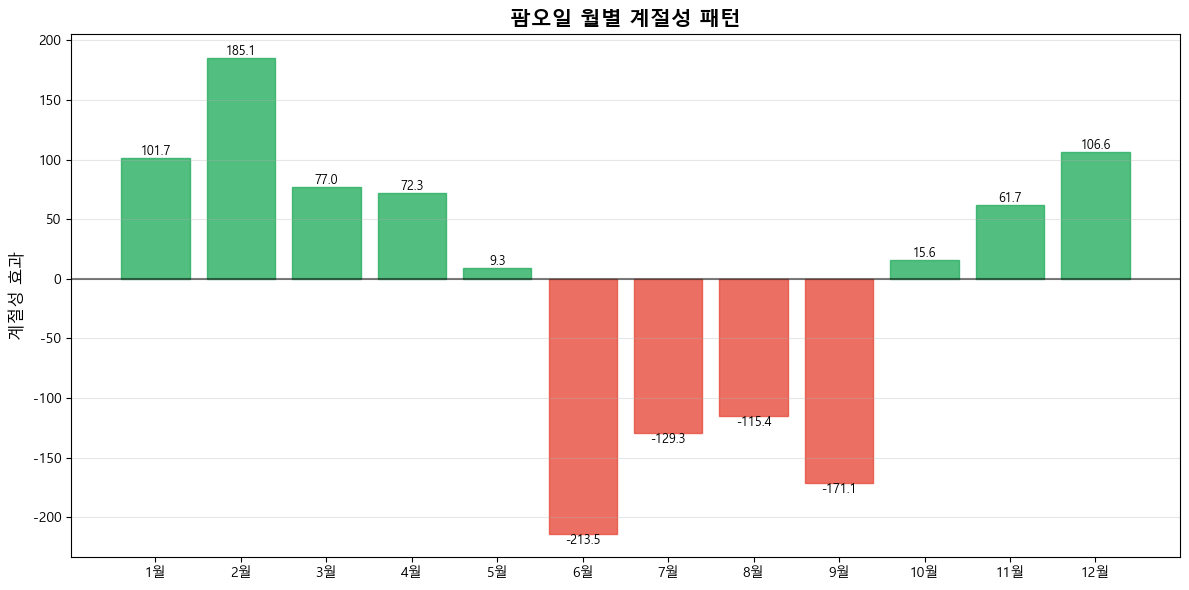


üìÖ ÌåúÏò§Ïùº Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù:
   ÏµúÍ≥†Ï†ê: 2Ïõî (185.06)
   ÏµúÏ†ÄÏ†ê: 6Ïõî (-213.52)
   Í≥ÑÏ†àÏÑ± Î≥ÄÎèôÌè≠: 398.58

üî¨ ÌåúÏò§Ïùº Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï:
   ADF ÌÜµÍ≥ÑÎüâ: -1.117849
   p-value: 0.707902
   ‚ùå ÌåúÏò§Ïùº ÎπÑÏ†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p > 0.05)

üîÑ ÌåúÏò§Ïùº 1Ï∞® Ï∞®Î∂Ñ Ï†ÅÏö©:
   ADF ÌÜµÍ≥ÑÎüâ: -6.820879
   p-value: 0.000000
   ‚úÖ ÌåúÏò§Ïùº 1Ï∞® Ï∞®Î∂Ñ Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p < 0.05)


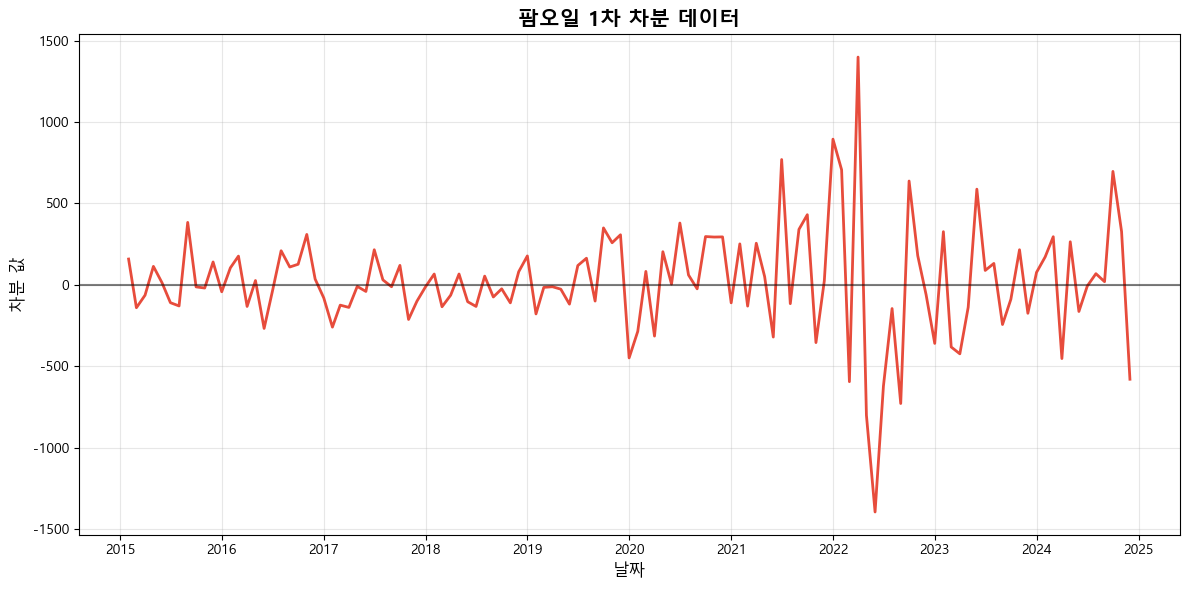


üìä ÌåúÏò§Ïùº ÏûêÍ∏∞ÏÉÅÍ¥Ä Î∂ÑÏÑù:


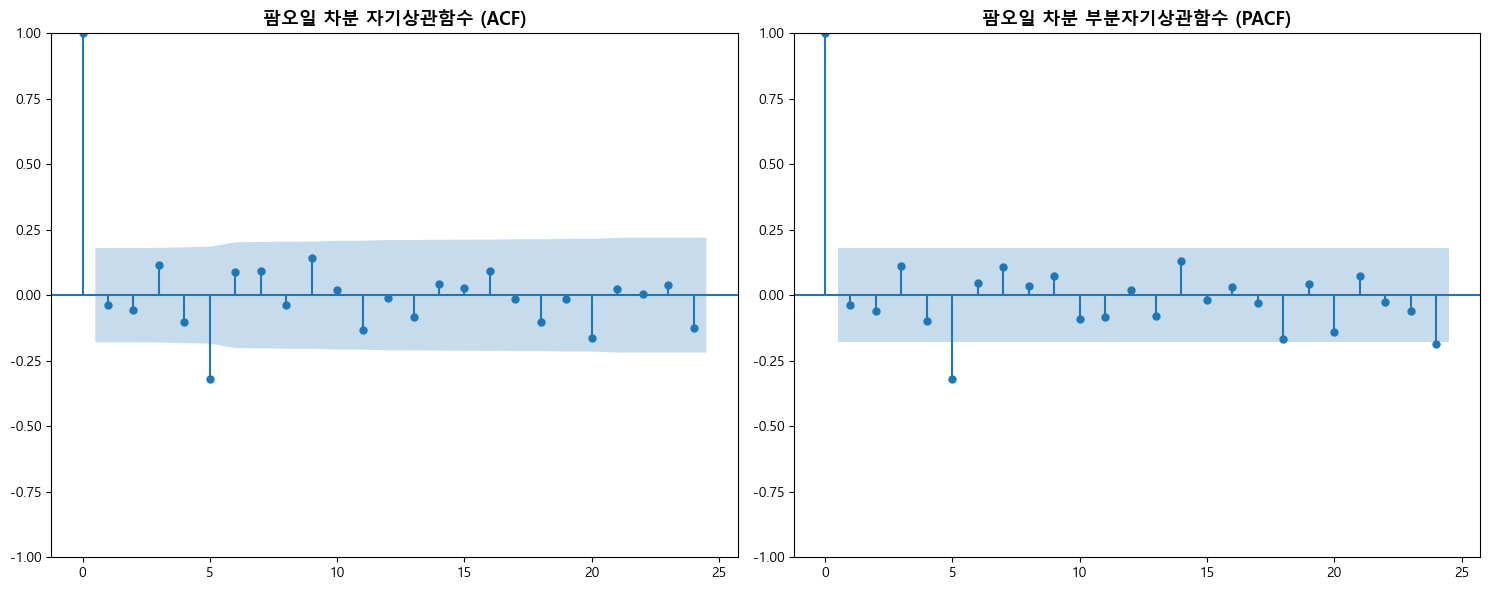

‚úÖ ÌåúÏò§Ïùº Î∂ÑÏÑù ÏôÑÎ£å!

üìä ÎÇòÌîÑÌÉÄ Î∂ÑÏÑù Ï§ë... (3/7)

üìà ÎÇòÌîÑÌÉÄ Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
   ÌèâÍ∑†: 565.91
   ÏµúÏÜüÍ∞í: 276.81 (2020-04)
   ÏµúÎåìÍ∞í: 878.21 (2022-04)
   ÌëúÏ§ÄÌé∏Ï∞®: 134.04
   Î≥ÄÎèôÍ≥ÑÏàò: 23.7%

üîç ÎÇòÌîÑÌÉÄ ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Ï§ë...


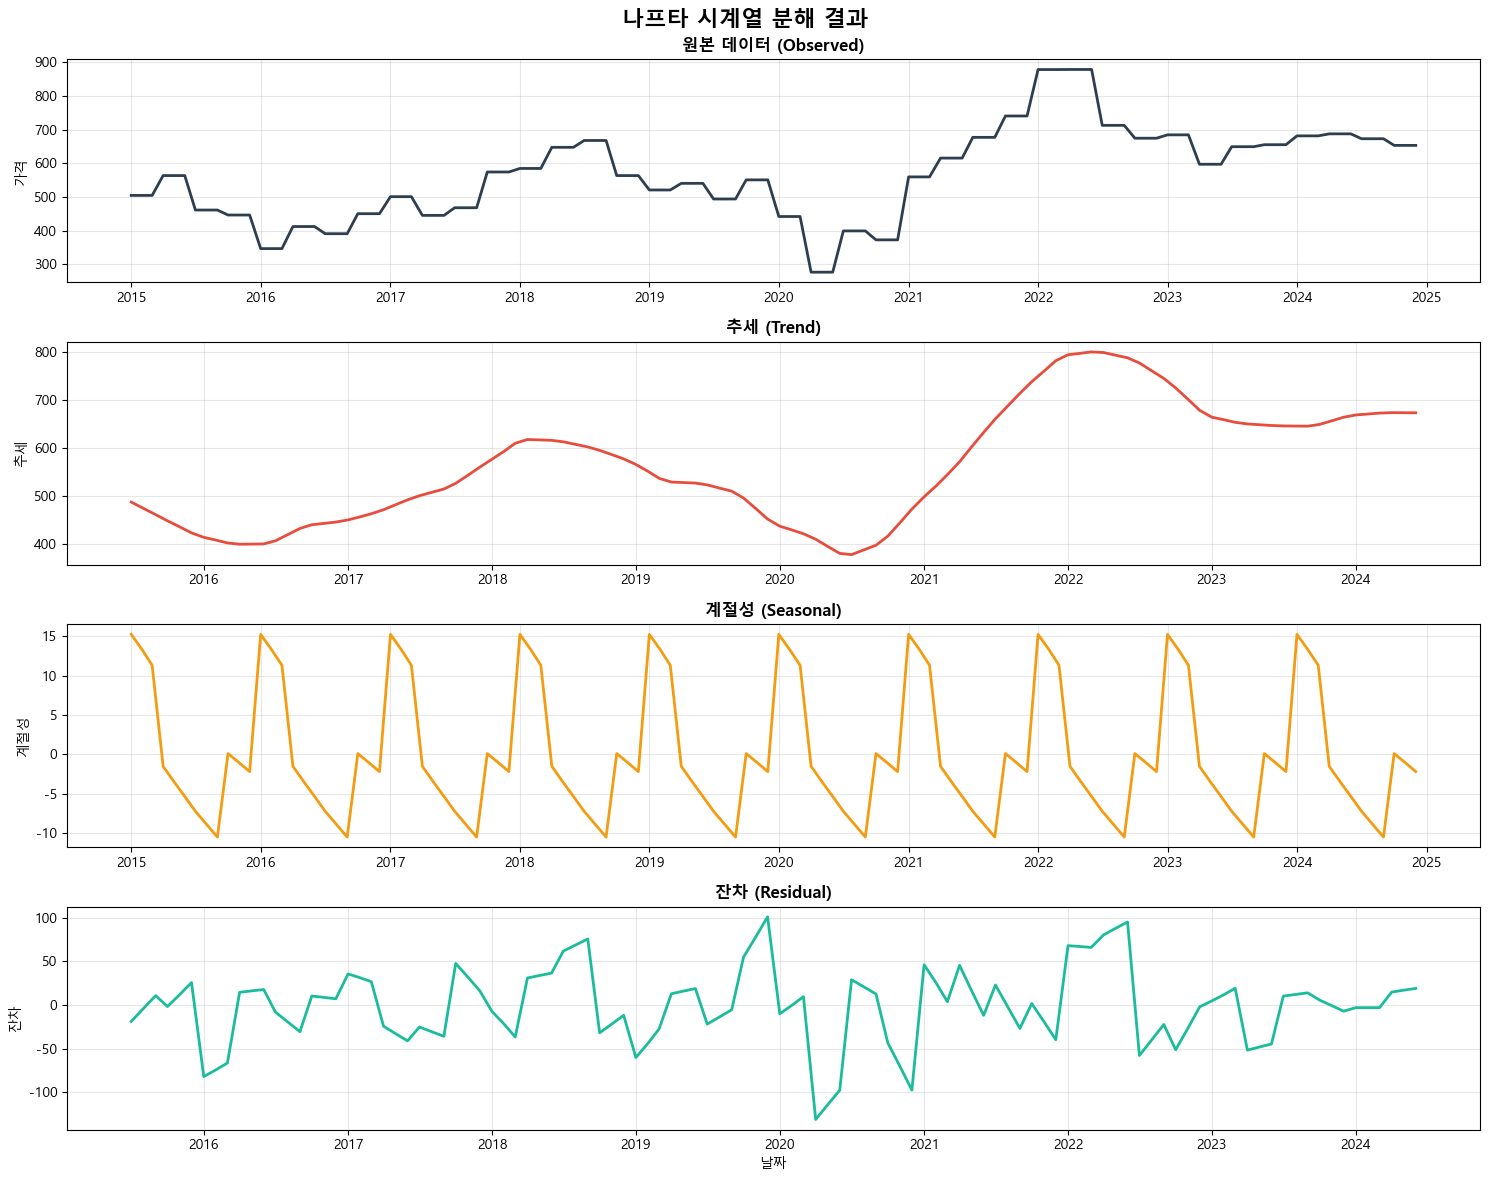

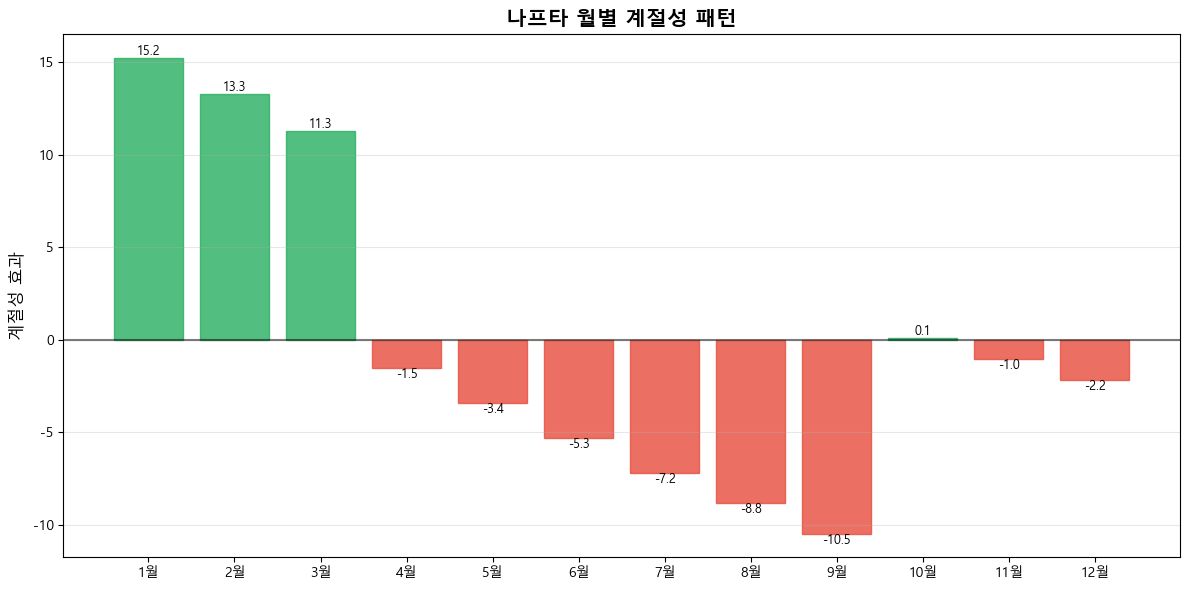


üìÖ ÎÇòÌîÑÌÉÄ Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù:
   ÏµúÍ≥†Ï†ê: 1Ïõî (15.24)
   ÏµúÏ†ÄÏ†ê: 9Ïõî (-10.47)
   Í≥ÑÏ†àÏÑ± Î≥ÄÎèôÌè≠: 25.71

üî¨ ÎÇòÌîÑÌÉÄ Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï:
   ADF ÌÜµÍ≥ÑÎüâ: -1.781592
   p-value: 0.389638
   ‚ùå ÎÇòÌîÑÌÉÄ ÎπÑÏ†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p > 0.05)

üîÑ ÎÇòÌîÑÌÉÄ 1Ï∞® Ï∞®Î∂Ñ Ï†ÅÏö©:
   ADF ÌÜµÍ≥ÑÎüâ: -10.778972
   p-value: 0.000000
   ‚úÖ ÎÇòÌîÑÌÉÄ 1Ï∞® Ï∞®Î∂Ñ Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p < 0.05)


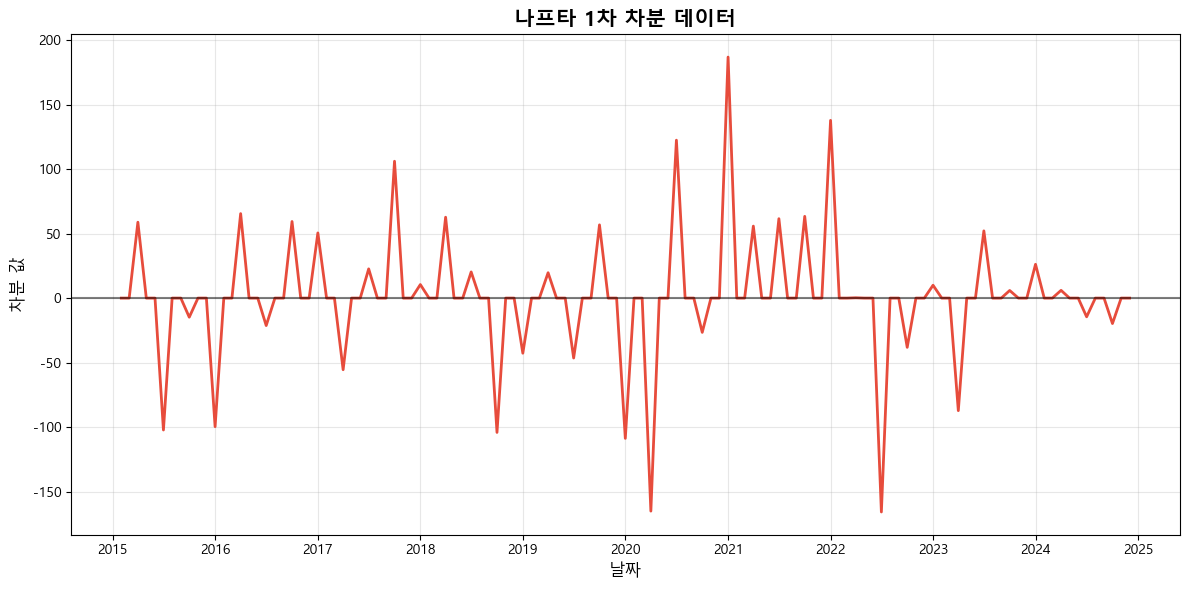


üìä ÎÇòÌîÑÌÉÄ ÏûêÍ∏∞ÏÉÅÍ¥Ä Î∂ÑÏÑù:


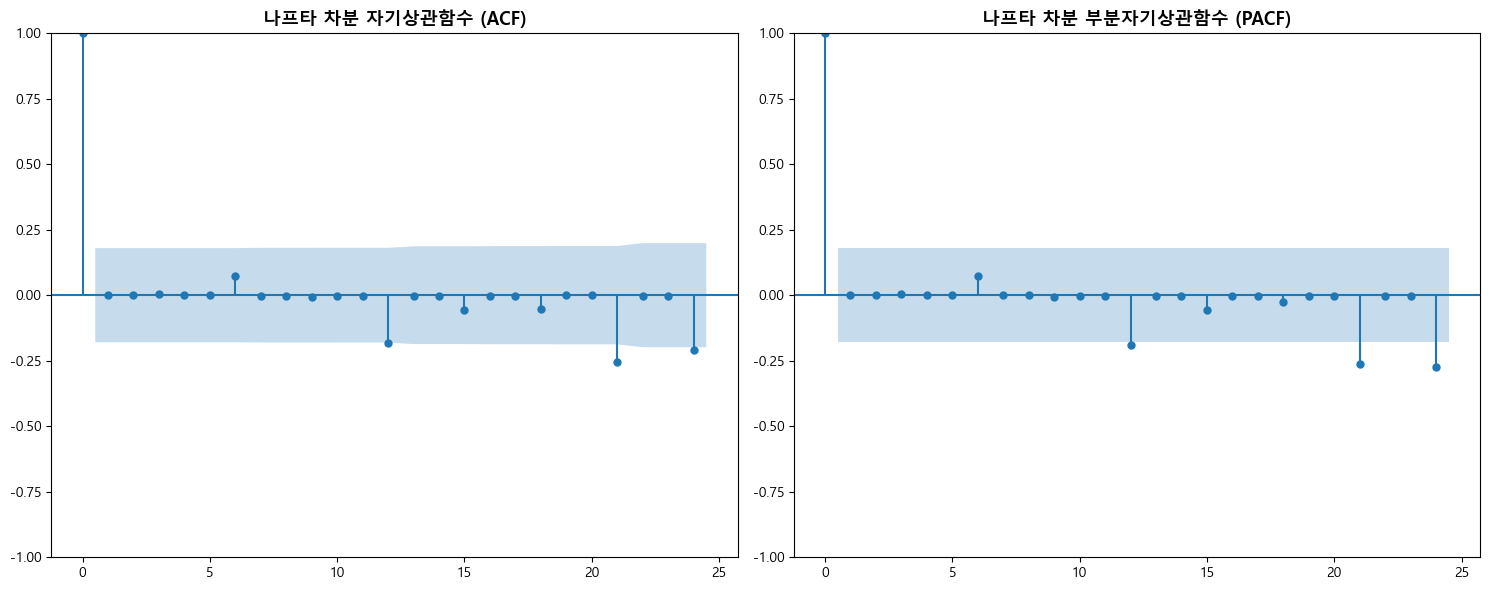

‚úÖ ÎÇòÌîÑÌÉÄ Î∂ÑÏÑù ÏôÑÎ£å!

üìä ÏóêÌã∏Î†å Î∂ÑÏÑù Ï§ë... (4/7)

üìà ÏóêÌã∏Î†å Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
   ÌèâÍ∑†: 1001.46
   ÏµúÏÜüÍ∞í: 588.58 (2020-04)
   ÏµúÎåìÍ∞í: 1383.33 (2015-04)
   ÌëúÏ§ÄÌé∏Ï∞®: 188.24
   Î≥ÄÎèôÍ≥ÑÏàò: 18.8%

üîç ÏóêÌã∏Î†å ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Ï§ë...


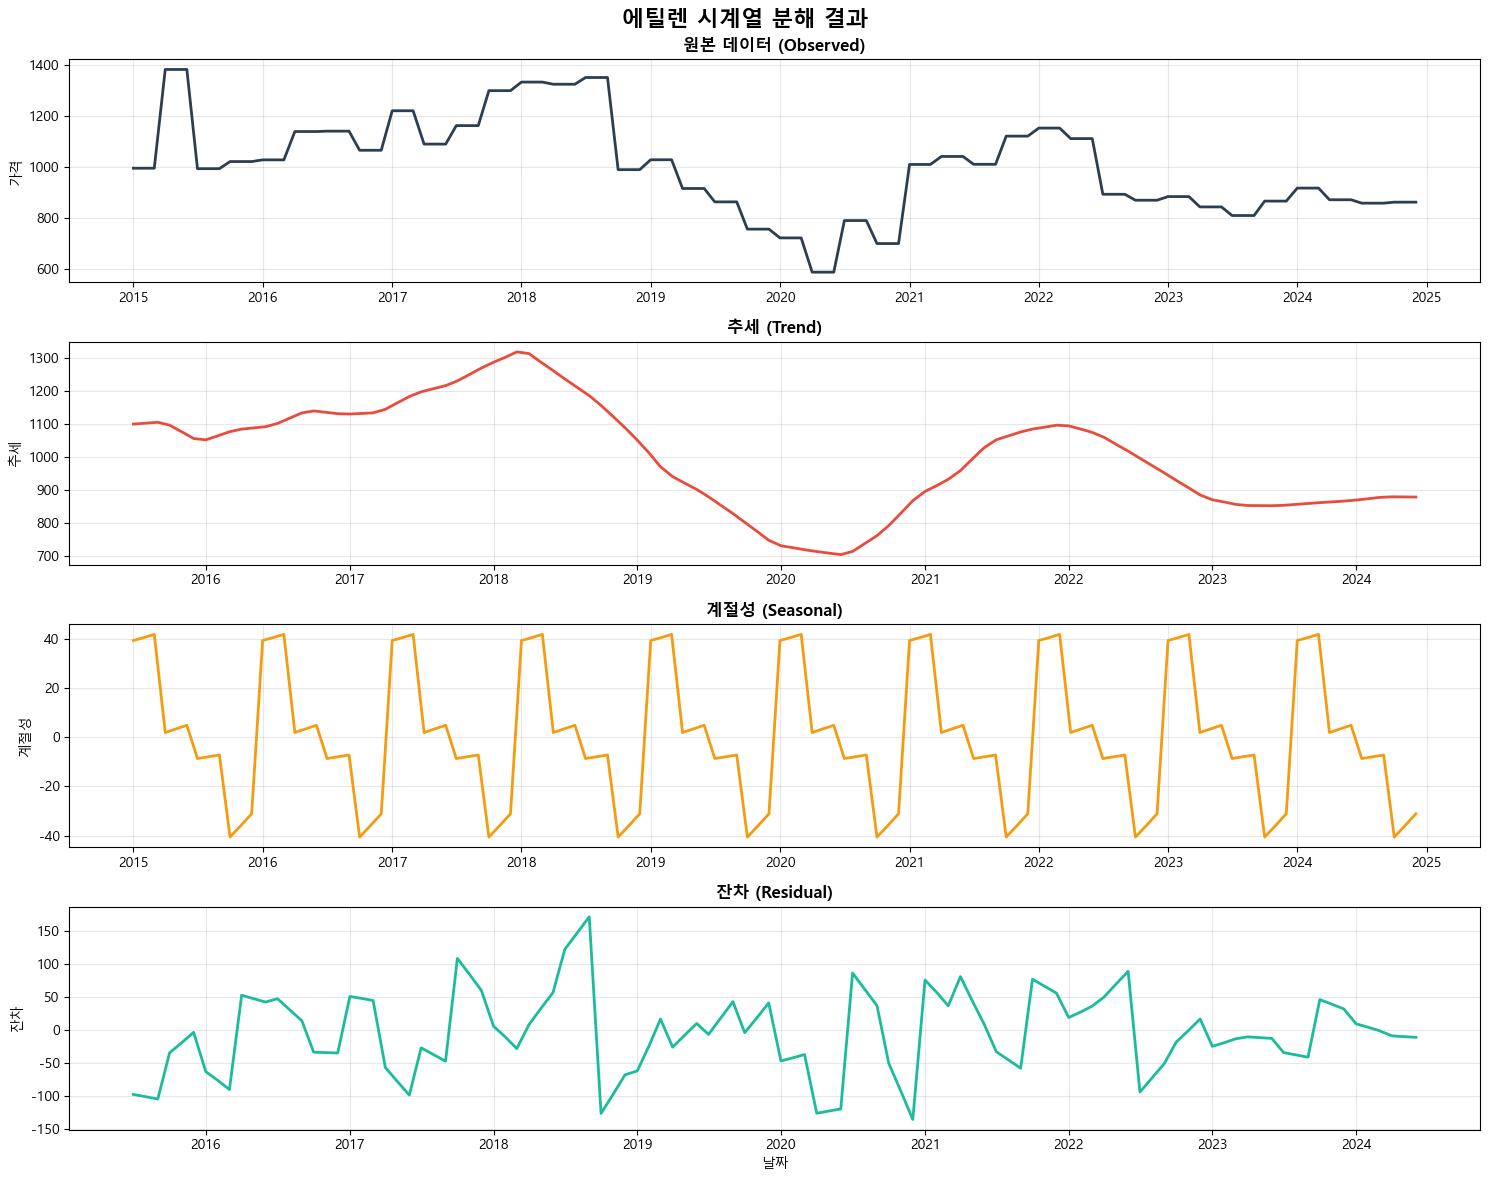

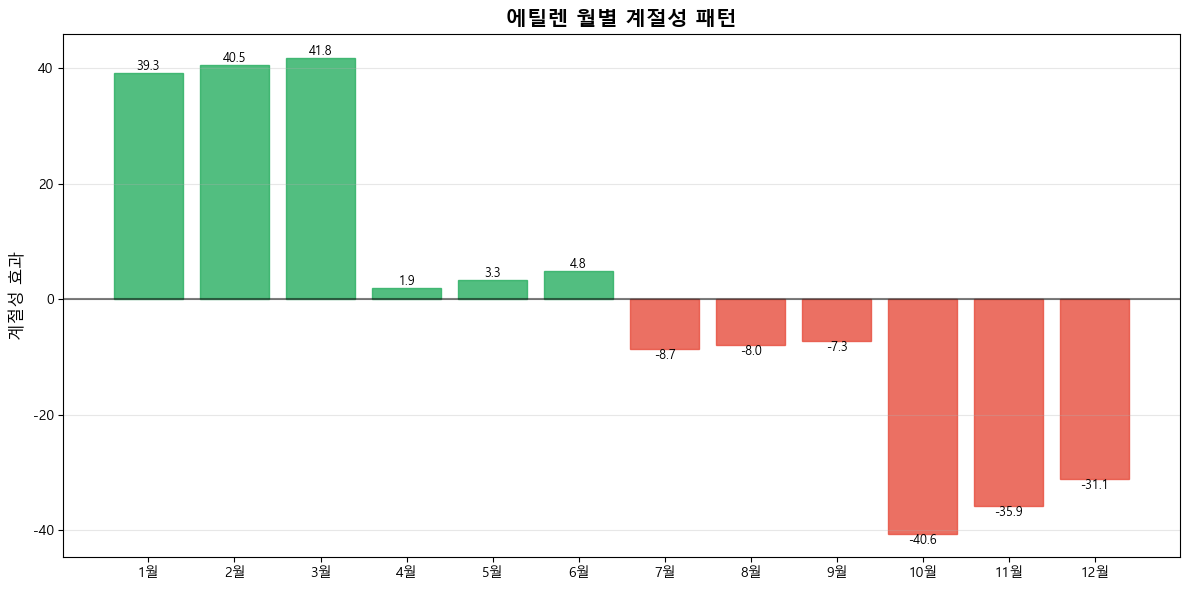


üìÖ ÏóêÌã∏Î†å Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù:
   ÏµúÍ≥†Ï†ê: 3Ïõî (41.76)
   ÏµúÏ†ÄÏ†ê: 10Ïõî (-40.60)
   Í≥ÑÏ†àÏÑ± Î≥ÄÎèôÌè≠: 82.36

üî¨ ÏóêÌã∏Î†å Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï:
   ADF ÌÜµÍ≥ÑÎüâ: -2.336203
   p-value: 0.160557
   ‚ùå ÏóêÌã∏Î†å ÎπÑÏ†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p > 0.05)

üîÑ ÏóêÌã∏Î†å 1Ï∞® Ï∞®Î∂Ñ Ï†ÅÏö©:
   ADF ÌÜµÍ≥ÑÎüâ: -10.772386
   p-value: 0.000000
   ‚úÖ ÏóêÌã∏Î†å 1Ï∞® Ï∞®Î∂Ñ Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p < 0.05)


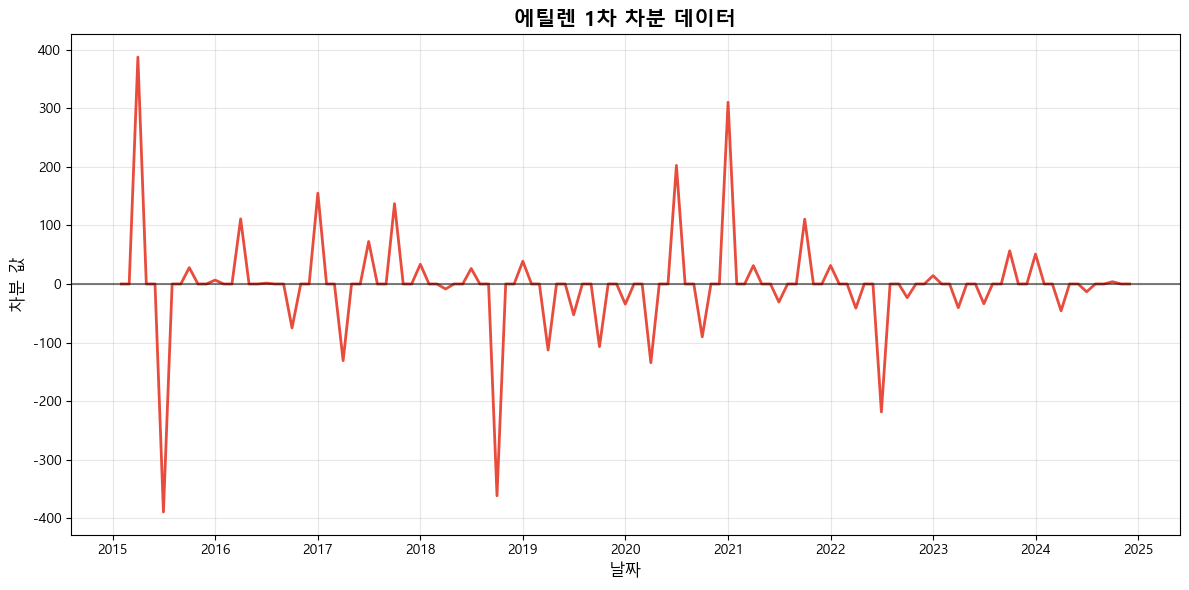


üìä ÏóêÌã∏Î†å ÏûêÍ∏∞ÏÉÅÍ¥Ä Î∂ÑÏÑù:


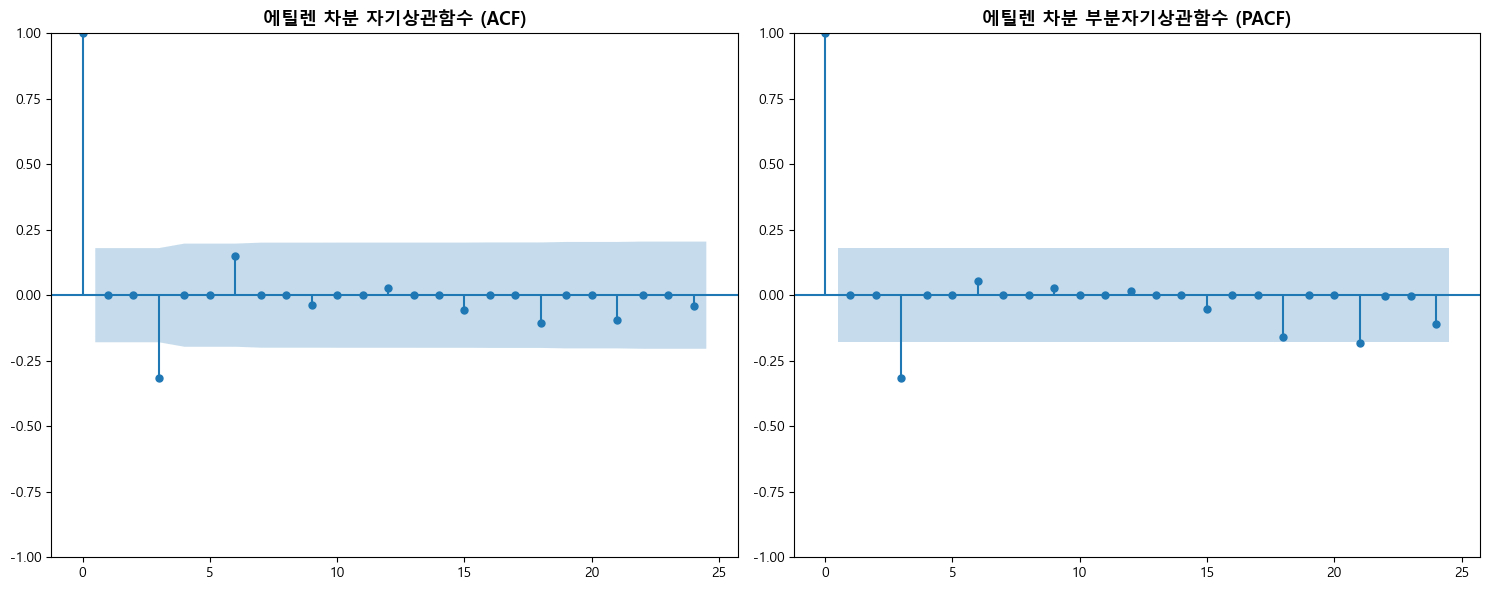

‚úÖ ÏóêÌã∏Î†å Î∂ÑÏÑù ÏôÑÎ£å!

üìä ÌîÑÎ°úÌïÑÎ†å Î∂ÑÏÑù Ï§ë... (5/7)

üìà ÌîÑÎ°úÌïÑÎ†å Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
   ÌèâÍ∑†: 905.11
   ÏµúÏÜüÍ∞í: 609.05 (2015-10)
   ÏµúÎåìÍ∞í: 1131.00 (2022-01)
   ÌëúÏ§ÄÌé∏Ï∞®: 124.36
   Î≥ÄÎèôÍ≥ÑÏàò: 13.7%

üîç ÌîÑÎ°úÌïÑÎ†å ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Ï§ë...


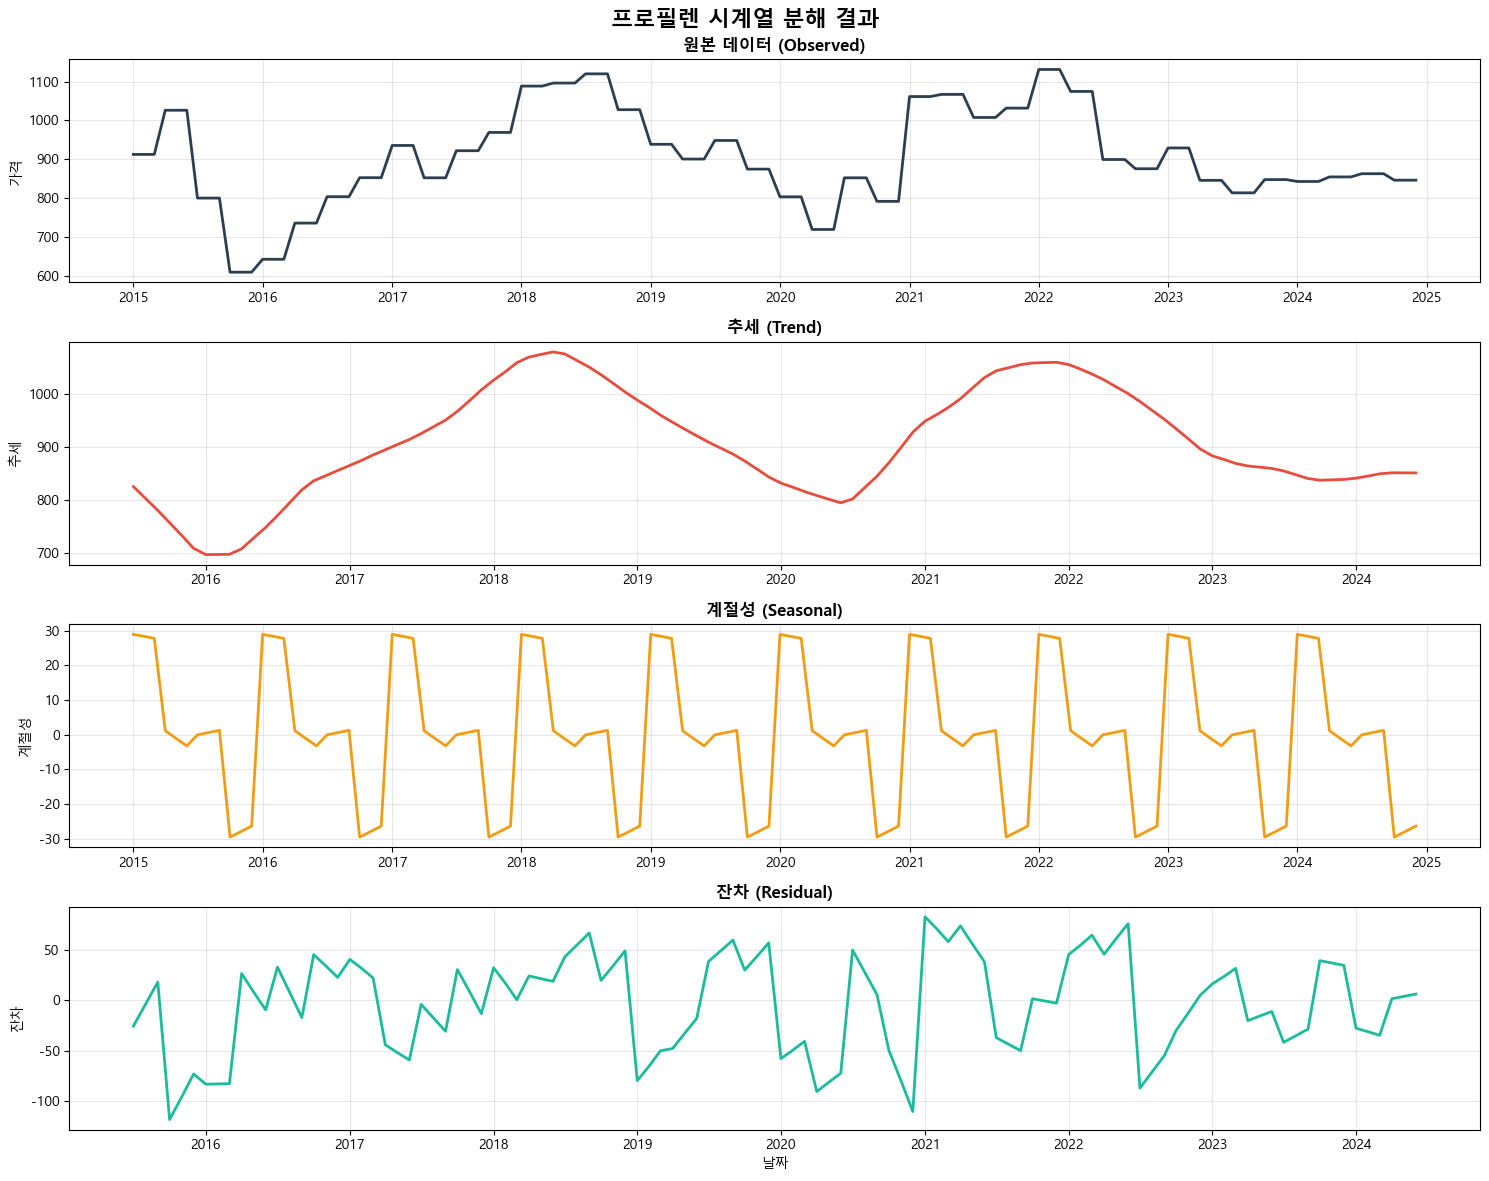

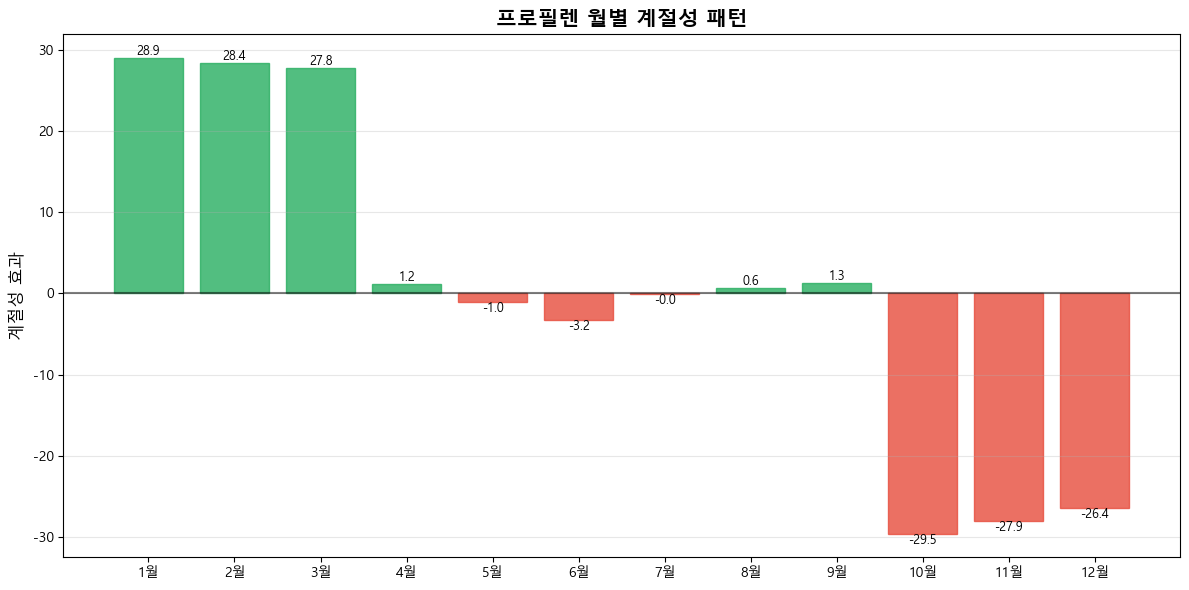


üìÖ ÌîÑÎ°úÌïÑÎ†å Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù:
   ÏµúÍ≥†Ï†ê: 1Ïõî (28.95)
   ÏµúÏ†ÄÏ†ê: 10Ïõî (-29.53)
   Í≥ÑÏ†àÏÑ± Î≥ÄÎèôÌè≠: 58.48

üî¨ ÌîÑÎ°úÌïÑÎ†å Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï:
   ADF ÌÜµÍ≥ÑÎüâ: -2.379418
   p-value: 0.147630
   ‚ùå ÌîÑÎ°úÌïÑÎ†å ÎπÑÏ†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p > 0.05)

üîÑ ÌîÑÎ°úÌïÑÎ†å 1Ï∞® Ï∞®Î∂Ñ Ï†ÅÏö©:
   ADF ÌÜµÍ≥ÑÎüâ: -10.771491
   p-value: 0.000000
   ‚úÖ ÌîÑÎ°úÌïÑÎ†å 1Ï∞® Ï∞®Î∂Ñ Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p < 0.05)


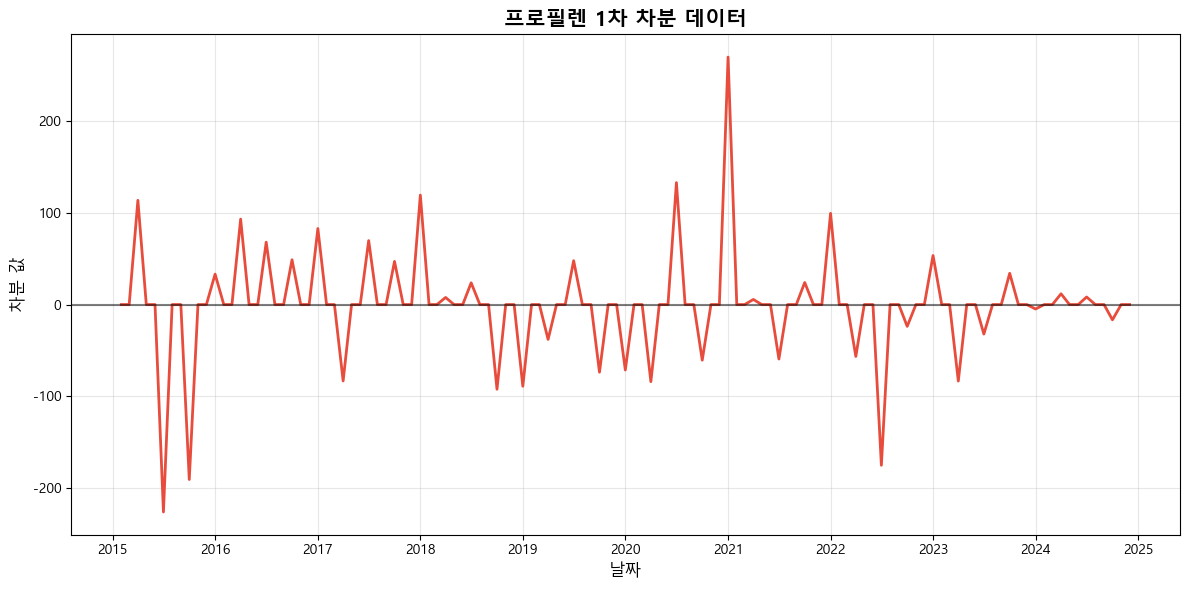


üìä ÌîÑÎ°úÌïÑÎ†å ÏûêÍ∏∞ÏÉÅÍ¥Ä Î∂ÑÏÑù:


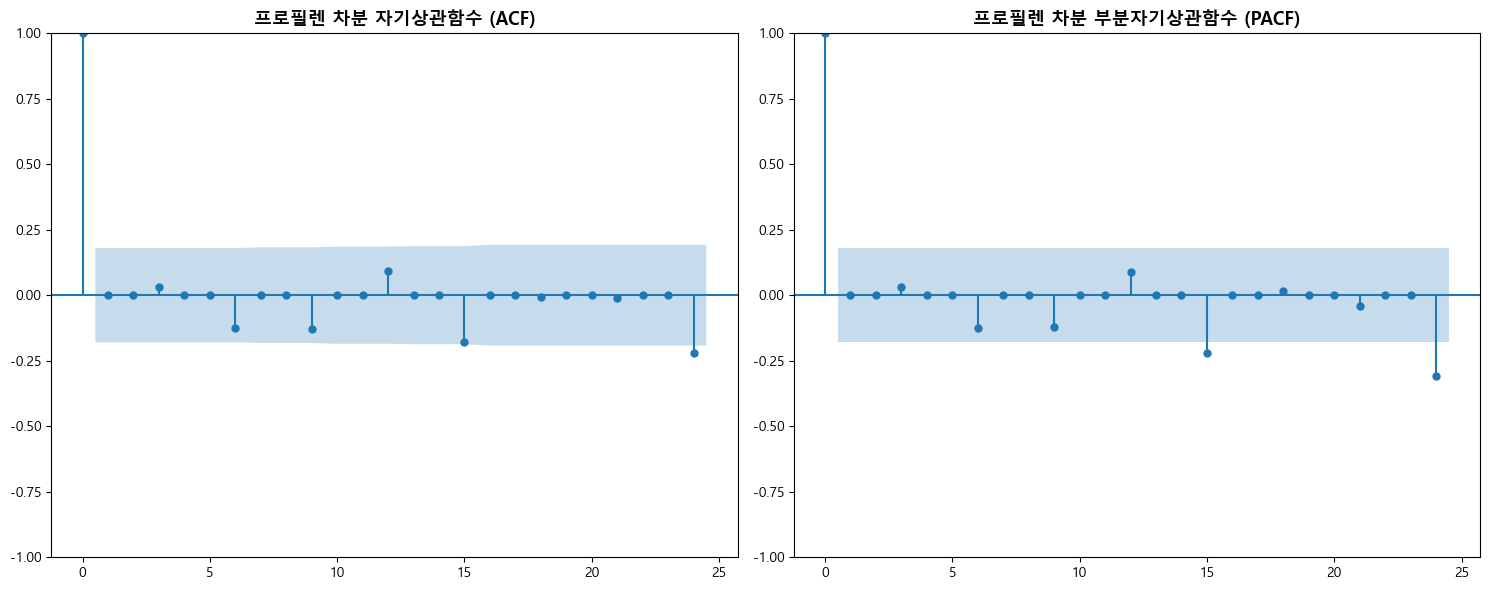

‚úÖ ÌîÑÎ°úÌïÑÎ†å Î∂ÑÏÑù ÏôÑÎ£å!

üìä HDPE Î∂ÑÏÑù Ï§ë... (6/7)

üìà HDPE Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
   ÌèâÍ∑†: 1021.27
   ÏµúÏÜüÍ∞í: 735.17 (2020-04)
   ÏµúÎåìÍ∞í: 1334.50 (2015-04)
   ÌëúÏ§ÄÌé∏Ï∞®: 140.58
   Î≥ÄÎèôÍ≥ÑÏàò: 13.8%

üîç HDPE ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Ï§ë...


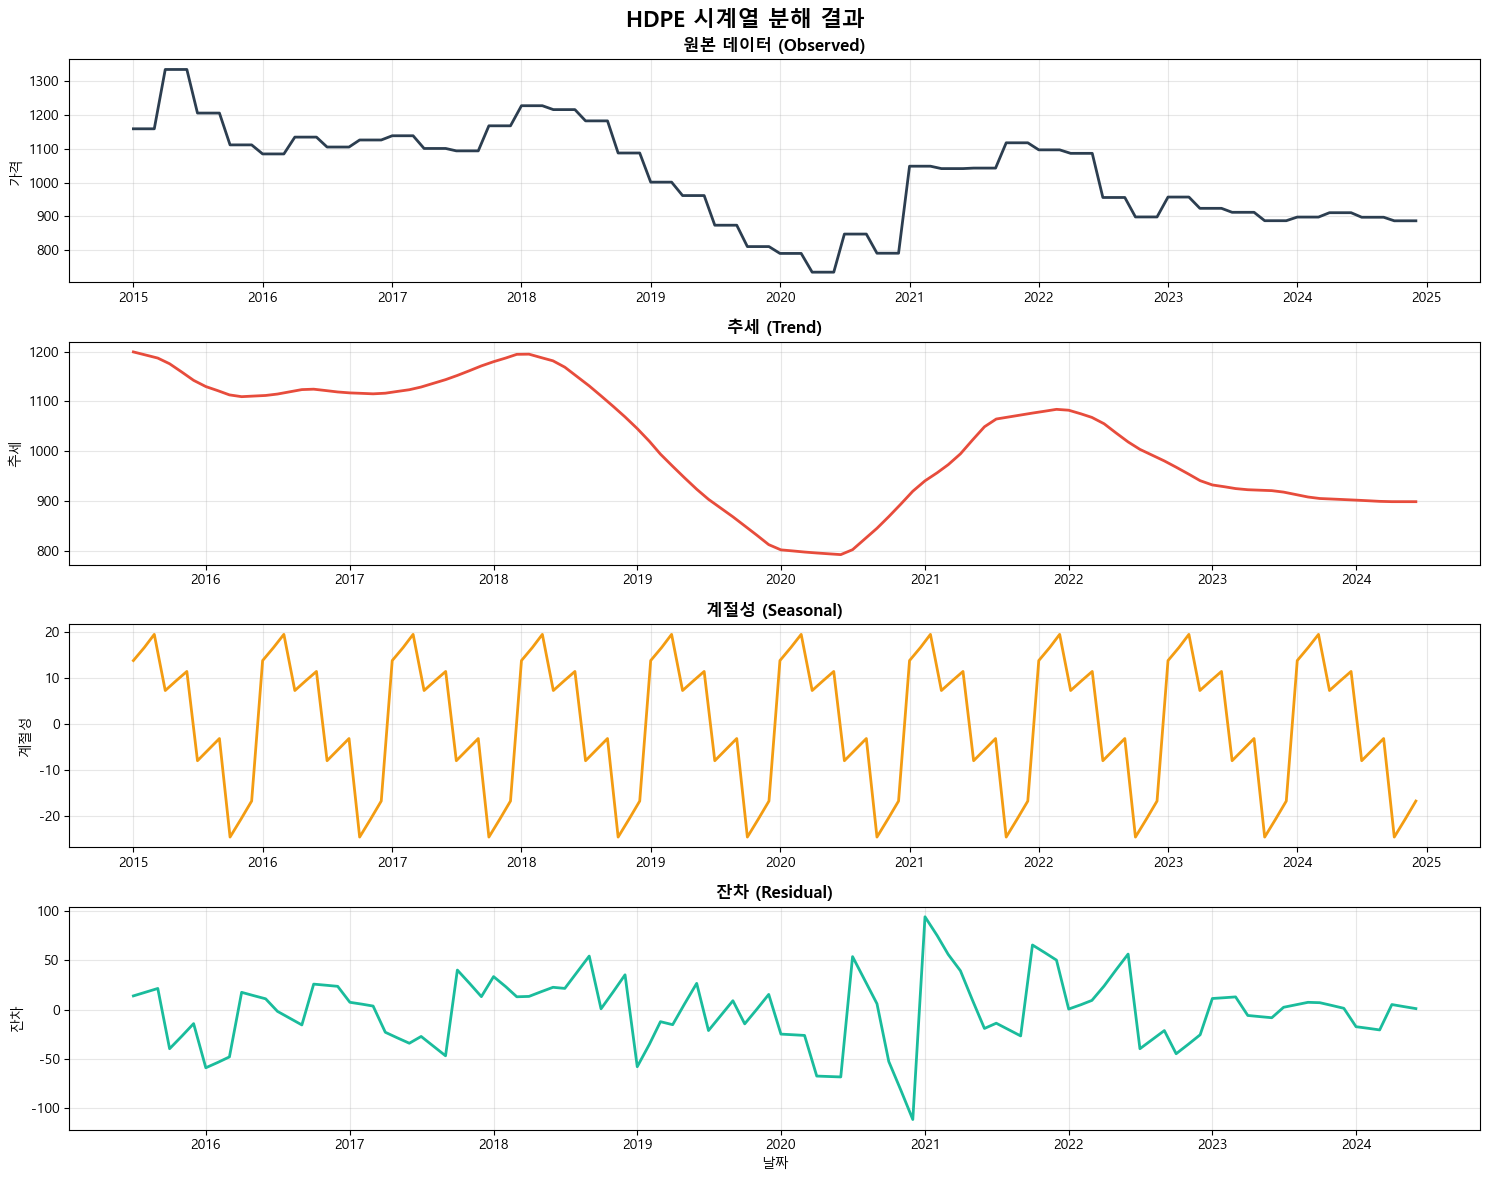

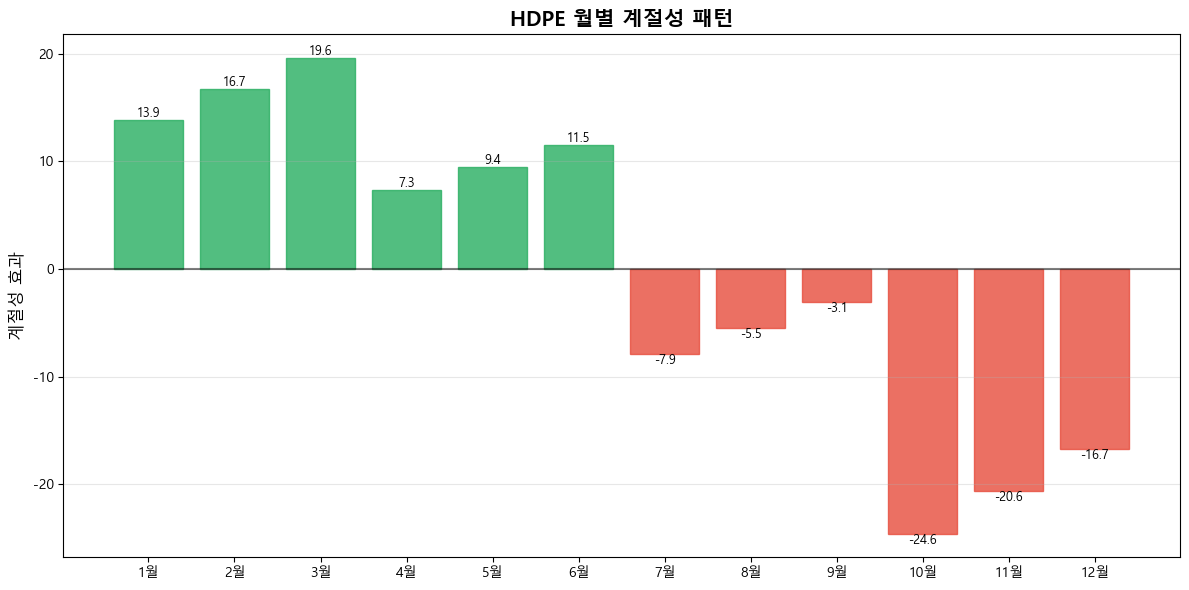


üìÖ HDPE Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù:
   ÏµúÍ≥†Ï†ê: 3Ïõî (19.58)
   ÏµúÏ†ÄÏ†ê: 10Ïõî (-24.56)
   Í≥ÑÏ†àÏÑ± Î≥ÄÎèôÌè≠: 44.13

üî¨ HDPE Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï:
   ADF ÌÜµÍ≥ÑÎüâ: -1.687087
   p-value: 0.437778
   ‚ùå HDPE ÎπÑÏ†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p > 0.05)

üîÑ HDPE 1Ï∞® Ï∞®Î∂Ñ Ï†ÅÏö©:
   ADF ÌÜµÍ≥ÑÎüâ: -10.801115
   p-value: 0.000000
   ‚úÖ HDPE 1Ï∞® Ï∞®Î∂Ñ Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p < 0.05)


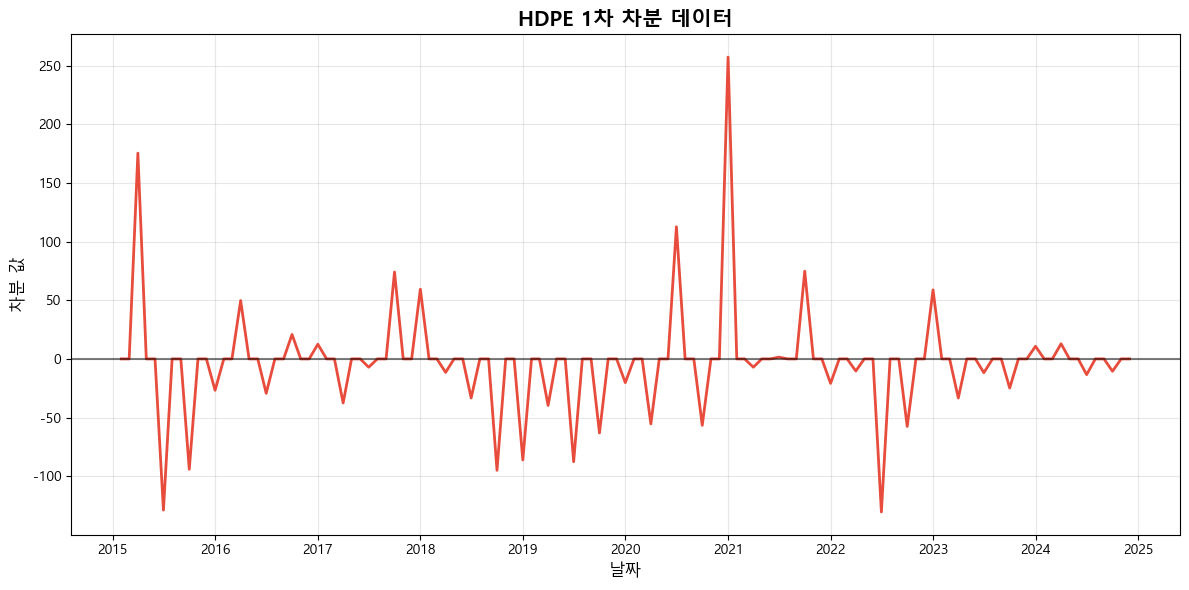


üìä HDPE ÏûêÍ∏∞ÏÉÅÍ¥Ä Î∂ÑÏÑù:


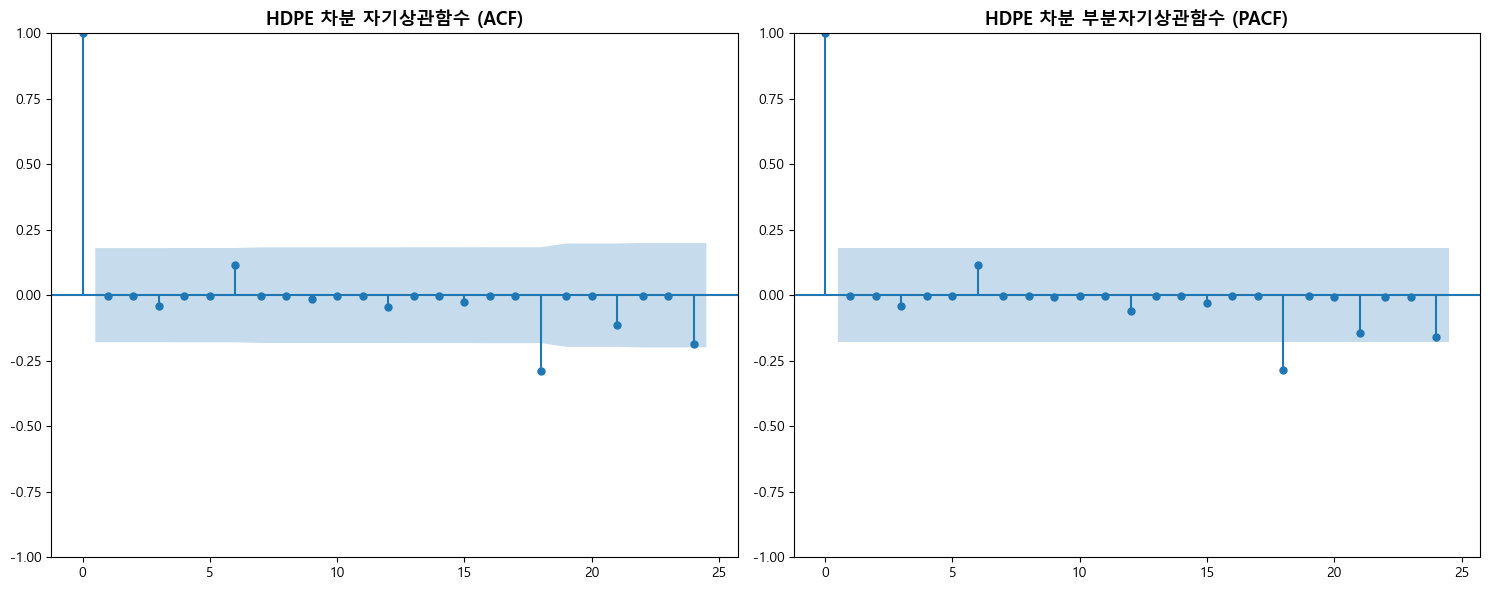

‚úÖ HDPE Î∂ÑÏÑù ÏôÑÎ£å!

üìä PP Î∂ÑÏÑù Ï§ë... (7/7)

üìà PP Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
   ÌèâÍ∑†: 1010.94
   ÏµúÏÜüÍ∞í: 809.58 (2020-04)
   ÏµúÎåìÍ∞í: 1244.17 (2015-04)
   ÌëúÏ§ÄÌé∏Ï∞®: 123.89
   Î≥ÄÎèôÍ≥ÑÏàò: 12.3%

üîç PP ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Ï§ë...


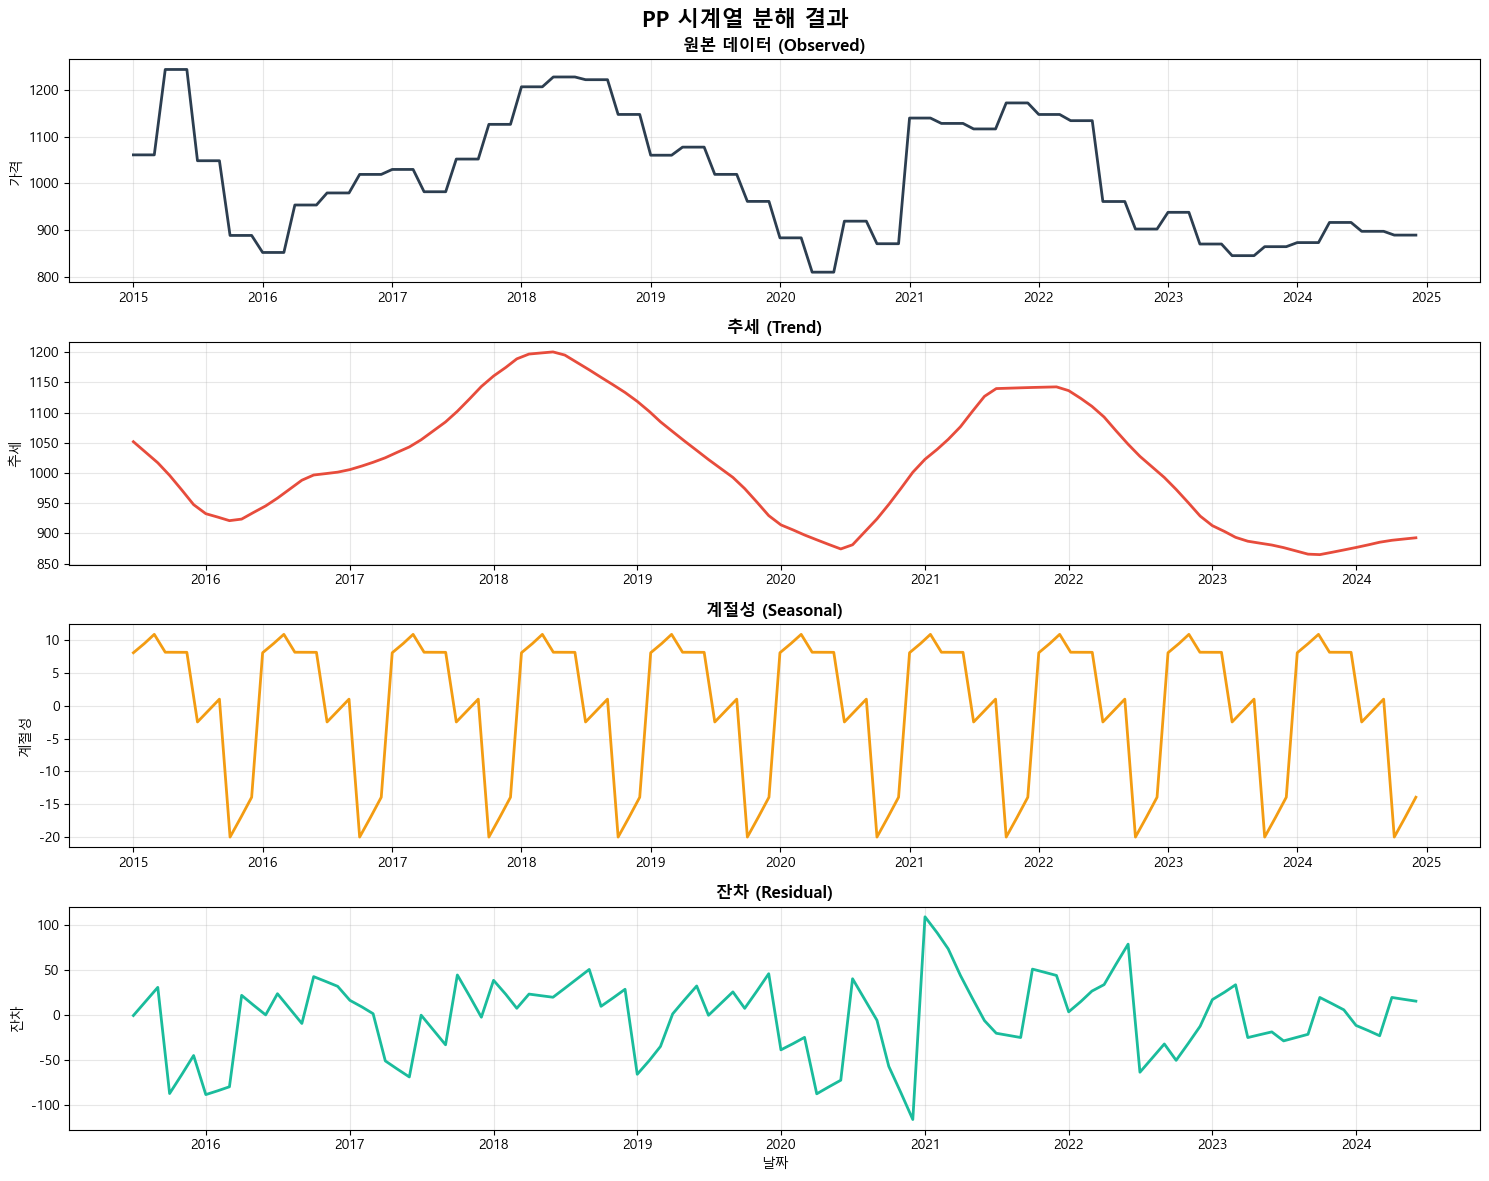

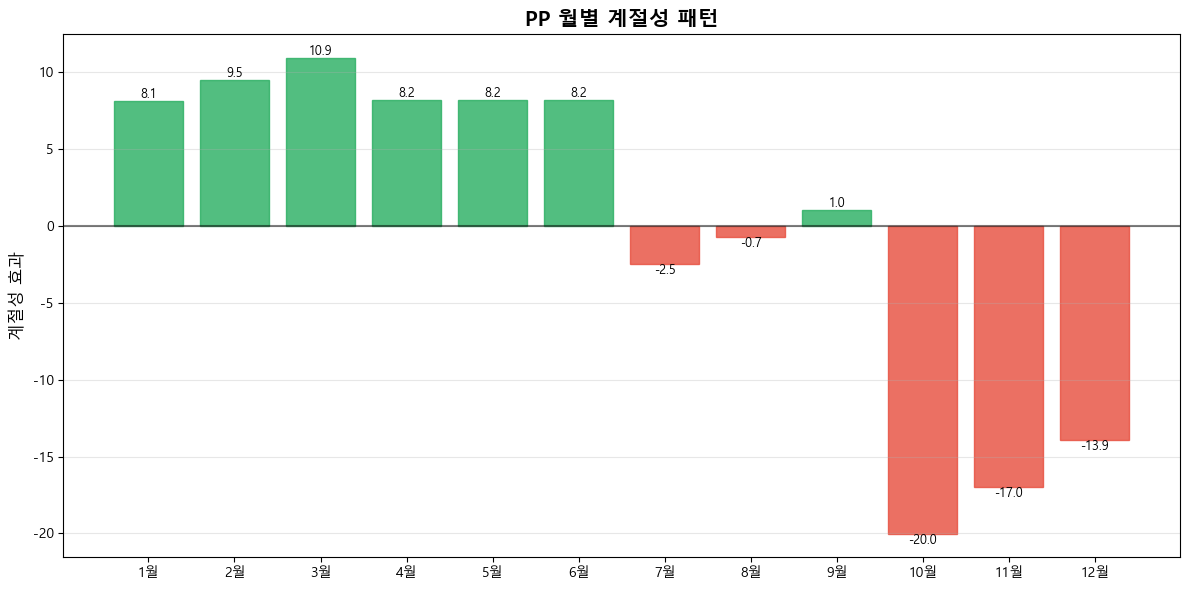


üìÖ PP Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù:
   ÏµúÍ≥†Ï†ê: 3Ïõî (10.91)
   ÏµúÏ†ÄÏ†ê: 10Ïõî (-20.01)
   Í≥ÑÏ†àÏÑ± Î≥ÄÎèôÌè≠: 30.91

üî¨ PP Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï:
   ADF ÌÜµÍ≥ÑÎüâ: -2.137201
   p-value: 0.229821
   ‚ùå PP ÎπÑÏ†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p > 0.05)

üîÑ PP 1Ï∞® Ï∞®Î∂Ñ Ï†ÅÏö©:
   ADF ÌÜµÍ≥ÑÎüâ: -10.779436
   p-value: 0.000000
   ‚úÖ PP 1Ï∞® Ï∞®Î∂Ñ Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p < 0.05)


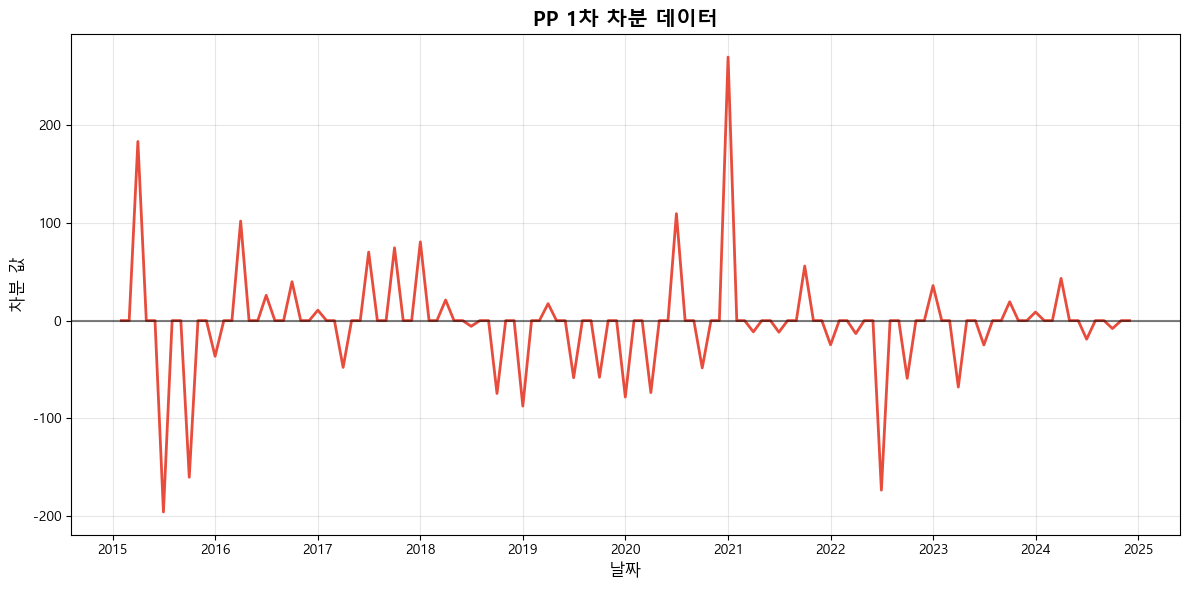


üìä PP ÏûêÍ∏∞ÏÉÅÍ¥Ä Î∂ÑÏÑù:


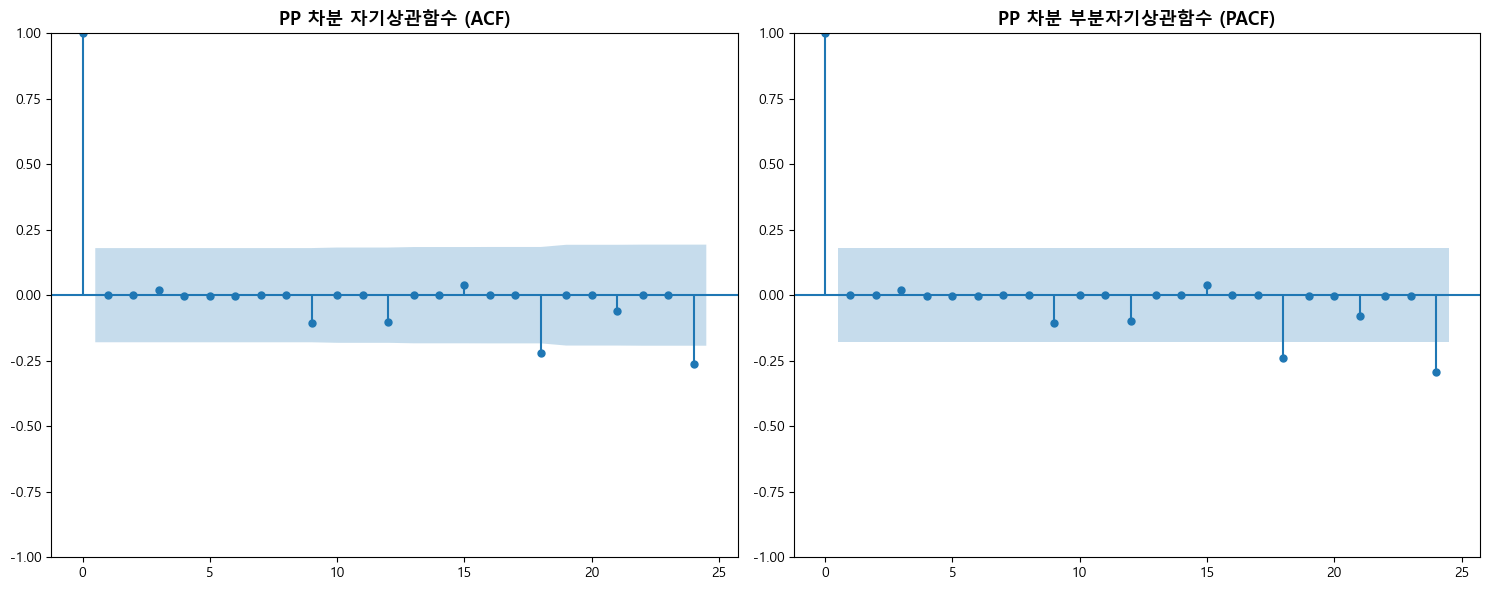

‚úÖ PP Î∂ÑÏÑù ÏôÑÎ£å!


In [46]:
ÌíàÎ™©_Î¶¨Ïä§Ìä∏ = df_oil_long['ÌíàÎ™©Î™Ö'].unique()
Î∂ÑÌï¥_Í≤∞Í≥º = {}  # Î∂ÑÌï¥ Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨

print(f"\n=== ÌíàÎ™©Î≥Ñ Í∞úÎ≥Ñ ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ ÏãúÏûë ({len(ÌíàÎ™©_Î¶¨Ïä§Ìä∏)}Í∞ú ÌíàÎ™©) ===")

for i, ÌíàÎ™© in enumerate(ÌíàÎ™©_Î¶¨Ïä§Ìä∏):
    print(f"\n{'='*50}")
    print(f"üìä {ÌíàÎ™©} Î∂ÑÏÑù Ï§ë... ({i+1}/{len(ÌíàÎ™©_Î¶¨Ïä§Ìä∏)})")
    print(f"{'='*50}")
    
    # Ìï¥Îãπ ÌíàÎ™© Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    ÌíàÎ™©_data = df_oil_long[df_oil_long['ÌíàÎ™©Î™Ö'] == ÌíàÎ™©]['Í∞ÄÍ≤©'].copy()
    
    # Í∏∞Î≥∏ ÌÜµÍ≥Ñ
    print(f"\nüìà {ÌíàÎ™©} Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
    print(f"   ÌèâÍ∑†: {ÌíàÎ™©_data.mean():.2f}")
    print(f"   ÏµúÏÜüÍ∞í: {ÌíàÎ™©_data.min():.2f} ({ÌíàÎ™©_data.idxmin().strftime('%Y-%m')})")
    print(f"   ÏµúÎåìÍ∞í: {ÌíàÎ™©_data.max():.2f} ({ÌíàÎ™©_data.idxmax().strftime('%Y-%m')})")
    print(f"   ÌëúÏ§ÄÌé∏Ï∞®: {ÌíàÎ™©_data.std():.2f}")
    print(f"   Î≥ÄÎèôÍ≥ÑÏàò: {(ÌíàÎ™©_data.std()/ÌíàÎ™©_data.mean()*100):.1f}%")
    
    try:
        # 1. ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥
        print(f"\nüîç {ÌíàÎ™©} ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Ï§ë...")
        decomposition = seasonal_decompose(ÌíàÎ™©_data, model='additive', period=12)
        
        # Î∂ÑÌï¥ Í≤∞Í≥º Ï†ÄÏû•
        Î∂ÑÌï¥_Í≤∞Í≥º[ÌíàÎ™©] = {
            'data': ÌíàÎ™©_data,
            'decomposition': decomposition,
            'seasonal_pattern': decomposition.seasonal[-12:].values
        }
        
        # 2. ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(15, 12))
        plt.suptitle(f'{ÌíàÎ™©} ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Í≤∞Í≥º', fontsize=16, fontweight='bold')
        
        # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞
        plt.subplot(411)
        plt.plot(decomposition.observed, color='#2c3e50', linewidth=2)
        plt.title('ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ (Observed)', fontsize=12, fontweight='bold')
        plt.ylabel('Í∞ÄÍ≤©', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # Ï∂îÏÑ∏
        plt.subplot(412)
        plt.plot(decomposition.trend, color='#e74c3c', linewidth=2)
        plt.title('Ï∂îÏÑ∏ (Trend)', fontsize=12, fontweight='bold')
        plt.ylabel('Ï∂îÏÑ∏', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # Í≥ÑÏ†àÏÑ±
        plt.subplot(413)
        plt.plot(decomposition.seasonal, color='#f39c12', linewidth=2)
        plt.title('Í≥ÑÏ†àÏÑ± (Seasonal)', fontsize=12, fontweight='bold')
        plt.ylabel('Í≥ÑÏ†àÏÑ±', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # ÏûîÏ∞®
        plt.subplot(414)
        plt.plot(decomposition.resid, color='#1abc9c', linewidth=2)
        plt.title('ÏûîÏ∞® (Residual)', fontsize=12, fontweight='bold')
        plt.ylabel('ÏûîÏ∞®', fontsize=10)
        plt.xlabel('ÎÇ†Ïßú', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 3. Í≥ÑÏ†àÏÑ± Ìå®ÌÑ¥ Î∂ÑÏÑù
        seasonal_pattern = decomposition.seasonal[-12:].values
        months = ['1Ïõî', '2Ïõî', '3Ïõî', '4Ïõî', '5Ïõî', '6Ïõî', 
                 '7Ïõî', '8Ïõî', '9Ïõî', '10Ïõî', '11Ïõî', '12Ïõî']
        
        plt.figure(figsize=(12, 6))
        bars = plt.bar(months, seasonal_pattern, color='#3498db', alpha=0.8)
        
        # ÏùåÏàò/ÏñëÏàòÏóê Îî∞Îùº ÏÉâÏÉÅ Î≥ÄÍ≤Ω
        for j, bar in enumerate(bars):
            if seasonal_pattern[j] < 0:
                bar.set_color('#e74c3c')
            else:
                bar.set_color('#27ae60')
        
        plt.title(f'{ÌíàÎ™©} ÏõîÎ≥Ñ Í≥ÑÏ†àÏÑ± Ìå®ÌÑ¥', fontsize=15, fontweight='bold')
        plt.ylabel('Í≥ÑÏ†àÏÑ± Ìö®Í≥º', fontsize=12)
        plt.grid(True, alpha=0.3, axis='y')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        
        # Í∞í ÌëúÏãú
        for j, v in enumerate(seasonal_pattern):
            plt.text(j, v, f'{v:.1f}', ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # Í≥ÑÏ†àÏÑ± Ìï¥ÏÑù
        max_month_idx = np.argmax(seasonal_pattern)
        min_month_idx = np.argmin(seasonal_pattern)
        
        print(f"\nüìÖ {ÌíàÎ™©} Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù:")
        print(f"   ÏµúÍ≥†Ï†ê: {months[max_month_idx]} ({seasonal_pattern[max_month_idx]:.2f})")
        print(f"   ÏµúÏ†ÄÏ†ê: {months[min_month_idx]} ({seasonal_pattern[min_month_idx]:.2f})")
        print(f"   Í≥ÑÏ†àÏÑ± Î≥ÄÎèôÌè≠: {seasonal_pattern.max() - seasonal_pattern.min():.2f}")
        
        # 4. Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï
        print(f"\nüî¨ {ÌíàÎ™©} Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï:")
        
        def adf_test_detailed(series, name):
            from statsmodels.tsa.stattools import adfuller
            result = adfuller(series.dropna())
            
            print(f"   ADF ÌÜµÍ≥ÑÎüâ: {result[0]:.6f}")
            print(f"   p-value: {result[1]:.6f}")
            
            if result[1] <= 0.05:
                print(f"   ‚úÖ {name} Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p < 0.05)")
                return True
            else:
                print(f"   ‚ùå {name} ÎπÑÏ†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßê (p > 0.05)")
                return False
        
        is_stationary = adf_test_detailed(ÌíàÎ™©_data, ÌíàÎ™©)
        Î∂ÑÌï¥_Í≤∞Í≥º[ÌíàÎ™©]['is_stationary'] = is_stationary
        
        # 5. Ï∞®Î∂Ñ Ï†ÅÏö© (ÎπÑÏ†ïÏÉÅÏÑ±Ïù∏ Í≤ΩÏö∞)
        if not is_stationary:
            print(f"\nüîÑ {ÌíàÎ™©} 1Ï∞® Ï∞®Î∂Ñ Ï†ÅÏö©:")
            diff_data = ÌíàÎ™©_data.diff().dropna()
            Î∂ÑÌï¥_Í≤∞Í≥º[ÌíàÎ™©]['diff_data'] = diff_data
            
            # Ï∞®Î∂Ñ ÌõÑ Ï†ïÏÉÅÏÑ± Ïû¨Í≤ÄÏ†ï
            is_stationary_after_diff = adf_test_detailed(diff_data, f"{ÌíàÎ™©} 1Ï∞® Ï∞®Î∂Ñ")
            Î∂ÑÌï¥_Í≤∞Í≥º[ÌíàÎ™©]['is_stationary_after_diff'] = is_stationary_after_diff
            
            # Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
            plt.figure(figsize=(12, 6))
            plt.plot(diff_data.index, diff_data, color='#e74c3c', linewidth=2)
            plt.title(f'{ÌíàÎ™©} 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞', fontsize=15, fontweight='bold')
            plt.xlabel('ÎÇ†Ïßú', fontsize=12)
            plt.ylabel('Ï∞®Î∂Ñ Í∞í', fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
            plt.tight_layout()
            plt.show()
        
        # 6. ÏûêÍ∏∞ÏÉÅÍ¥Ä Î∂ÑÏÑù
        print(f"\nüìä {ÌíàÎ™©} ÏûêÍ∏∞ÏÉÅÍ¥Ä Î∂ÑÏÑù:")
        
        from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
        
        # Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù (Ï†ïÏÉÅÏÑ± Ïó¨Î∂ÄÏóê Îî∞Îùº)
        if is_stationary:
            analysis_data = ÌíàÎ™©_data
            data_name = f"{ÌíàÎ™©} ÏõêÎ≥∏"
        else:
            analysis_data = diff_data if not is_stationary else ÌíàÎ™©_data
            data_name = f"{ÌíàÎ™©} Ï∞®Î∂Ñ"
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(121)
        plot_acf(analysis_data.dropna(), ax=plt.gca(), lags=24, alpha=0.05)
        plt.title(f'{data_name} ÏûêÍ∏∞ÏÉÅÍ¥ÄÌï®Ïàò (ACF)', fontsize=13, fontweight='bold')
        
        plt.subplot(122)
        plot_pacf(analysis_data.dropna(), ax=plt.gca(), lags=24, alpha=0.05)
        plt.title(f'{data_name} Î∂ÄÎ∂ÑÏûêÍ∏∞ÏÉÅÍ¥ÄÌï®Ïàò (PACF)', fontsize=13, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        Î∂ÑÌï¥_Í≤∞Í≥º[ÌíàÎ™©]['analysis_data'] = analysis_data
        
        print(f"‚úÖ {ÌíàÎ™©} Î∂ÑÏÑù ÏôÑÎ£å!")
        
    except Exception as e:
        print(f"‚ùå {ÌíàÎ™©} Î∂ÑÏÑù Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        continue

In [47]:
print(f"\n{'='*60}")
print("üéØ Ï†ÑÏ≤¥ Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ")
print(f"{'='*60}")

for ÌíàÎ™© in ÌíàÎ™©_Î¶¨Ïä§Ìä∏:
    if ÌíàÎ™© in Î∂ÑÌï¥_Í≤∞Í≥º:
        Í≤∞Í≥º = Î∂ÑÌï¥_Í≤∞Í≥º[ÌíàÎ™©]
        seasonal_pattern = Í≤∞Í≥º['seasonal_pattern']
        
        print(f"\nüìä {ÌíàÎ™©}:")
        print(f"   ÌèâÍ∑† Í∞ÄÍ≤©: {Í≤∞Í≥º['data'].mean():.2f}")
        print(f"   Î≥ÄÎèôÏÑ±(CV): {(Í≤∞Í≥º['data'].std()/Í≤∞Í≥º['data'].mean()*100):.1f}%")
        print(f"   Ï†ïÏÉÅÏÑ±: {'‚úÖ' if Í≤∞Í≥º['is_stationary'] else '‚ùå'}")
        
        max_month_idx = np.argmax(seasonal_pattern)
        min_month_idx = np.argmin(seasonal_pattern)
        months = ['1Ïõî', '2Ïõî', '3Ïõî', '4Ïõî', '5Ïõî', '6Ïõî', '7Ïõî', '8Ïõî', '9Ïõî', '10Ïõî', '11Ïõî', '12Ïõî']
        
        print(f"   ÏµúÍ≥† Í≥ÑÏ†àÏÑ±: {months[max_month_idx]} ({seasonal_pattern[max_month_idx]:.2f})")
        print(f"   ÏµúÏ†Ä Í≥ÑÏ†àÏÑ±: {months[min_month_idx]} ({seasonal_pattern[min_month_idx]:.2f})")

# Î∂ÑÌï¥ Í≤∞Í≥ºÎ•º Ï†ÑÏó≠ Î≥ÄÏàòÎ°ú Ï†ÄÏû• (ÎÇòÏ§ëÏóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù)
globals()['ÌíàÎ™©Î≥Ñ_Î∂ÑÌï¥Í≤∞Í≥º'] = Î∂ÑÌï¥_Í≤∞Í≥º

print(f"\nüéâ Î™®Îì† ÌíàÎ™©Ïùò Í∞úÎ≥Ñ ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ ÏôÑÎ£å!")
print("Î∂ÑÌï¥ Í≤∞Í≥ºÎäî 'ÌíàÎ™©Î≥Ñ_Î∂ÑÌï¥Í≤∞Í≥º' Î≥ÄÏàòÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
print("\nÎã§Ïùå Îã®Í≥Ñ: ÌôîÏû•Ìíà ÏàòÏ∂úÏï° Îç∞Ïù¥ÌÑ∞ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù")


üéØ Ï†ÑÏ≤¥ Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ

üìä Ïú†Í∞Ä:
   ÌèâÍ∑† Í∞ÄÍ≤©: 62.08
   Î≥ÄÎèôÏÑ±(CV): 29.3%
   Ï†ïÏÉÅÏÑ±: ‚ùå
   ÏµúÍ≥† Í≥ÑÏ†àÏÑ±: 6Ïõî (2.31)
   ÏµúÏ†Ä Í≥ÑÏ†àÏÑ±: 12Ïõî (-3.62)

üìä ÌåúÏò§Ïùº:
   ÌèâÍ∑† Í∞ÄÍ≤©: 3186.13
   Î≥ÄÎèôÏÑ±(CV): 33.0%
   Ï†ïÏÉÅÏÑ±: ‚ùå
   ÏµúÍ≥† Í≥ÑÏ†àÏÑ±: 2Ïõî (185.06)
   ÏµúÏ†Ä Í≥ÑÏ†àÏÑ±: 6Ïõî (-213.52)

üìä ÎÇòÌîÑÌÉÄ:
   ÌèâÍ∑† Í∞ÄÍ≤©: 565.91
   Î≥ÄÎèôÏÑ±(CV): 23.7%
   Ï†ïÏÉÅÏÑ±: ‚ùå
   ÏµúÍ≥† Í≥ÑÏ†àÏÑ±: 1Ïõî (15.24)
   ÏµúÏ†Ä Í≥ÑÏ†àÏÑ±: 9Ïõî (-10.47)

üìä ÏóêÌã∏Î†å:
   ÌèâÍ∑† Í∞ÄÍ≤©: 1001.46
   Î≥ÄÎèôÏÑ±(CV): 18.8%
   Ï†ïÏÉÅÏÑ±: ‚ùå
   ÏµúÍ≥† Í≥ÑÏ†àÏÑ±: 3Ïõî (41.76)
   ÏµúÏ†Ä Í≥ÑÏ†àÏÑ±: 10Ïõî (-40.60)

üìä ÌîÑÎ°úÌïÑÎ†å:
   ÌèâÍ∑† Í∞ÄÍ≤©: 905.11
   Î≥ÄÎèôÏÑ±(CV): 13.7%
   Ï†ïÏÉÅÏÑ±: ‚ùå
   ÏµúÍ≥† Í≥ÑÏ†àÏÑ±: 1Ïõî (28.95)
   ÏµúÏ†Ä Í≥ÑÏ†àÏÑ±: 10Ïõî (-29.53)

üìä HDPE:
   ÌèâÍ∑† Í∞ÄÍ≤©: 1021.27
   Î≥ÄÎèôÏÑ±(CV): 13.8%
   Ï†ïÏÉÅÏÑ±: ‚ùå
   ÏµúÍ≥† Í≥ÑÏ†àÏÑ±: 3Ïõî (19.58)
   ÏµúÏ†Ä Í≥ÑÏ†àÏÑ±: 10Ïõî (-24.56)

üìä PP:
   ÌèâÍ∑† Í∞ÄÍ≤©: 1010.94
   Î≥ÄÎèôÏÑ